#### TODO

[X] Test with 2 different supervised models 

[X] Attempts with 2 different types of features (numerical and categorical)
 - [ ] maybe compare eachother individually ? numerical vs categorical

[ ] Parameter Tunning

[X] Comparison with random chance/supervised baseline

[X] Interpretation of results 

[X] Documentation

##### Nice to have
[X] Testing with a third method (Compare Isolation Forrest, which is the chosen method, with Random Forrest from literature)

[ ] Testing in transfer learning

In [92]:
import os
import pandas as pd

In [93]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mishra5001/credit-card")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\mishra5001\credit-card\versions\1


In [94]:
files = os.listdir(path)
print("Files:", files)

Files: ['application_data.csv', 'columns_description.csv', 'previous_application.csv']


In [95]:
dfs = {}
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(path, file)
        dfs[file] = pd.read_csv(file_path, encoding='cp1252')

In [96]:
application_data_df = dfs['application_data.csv']
columns_description_df = dfs['columns_description.csv']
previous_application_df = dfs['previous_application.csv']

# Example: access a specific DataFrame
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [97]:
# Display the columns description and show full description
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(columns_description_df)

Unnamed: 0                     Table                           Row  \
0             1          application_data                    SK_ID_CURR   
1             2          application_data                        TARGET   
2             5          application_data            NAME_CONTRACT_TYPE   
3             6          application_data                   CODE_GENDER   
4             7          application_data                  FLAG_OWN_CAR   
5             8          application_data               FLAG_OWN_REALTY   
6             9          application_data                  CNT_CHILDREN   
7            10          application_data              AMT_INCOME_TOTAL   
8            11          application_data                    AMT_CREDIT   
9            12          application_data                   AMT_ANNUITY   
10           13          application_data               AMT_GOODS_PRICE   
11           14          application_data               NAME_TYPE_SUITE   
12           15          application_data              NAME_INCOME_TYPE   
13           16          application_data           NAME_EDUCATION_TYPE   
14           17          application_data            NAME_FAMILY_STATUS   
15           18          application_data             NAME_HOUSING_TYPE   
16           19          application_data    REGION_POPULATION_RELATIVE   
17           20          application_data                    DAYS_BIRTH   
18           21          application_data                 DAYS_EMPLOYED   
19           22          application_data             DAYS_REGISTRATION   
20           23          application_data               DAYS_ID_PUBLISH   
21           24          application_data                   OWN_CAR_AGE   
22           25          application_data                    FLAG_MOBIL   
23           26          application_data                FLAG_EMP_PHONE   
24           27          application_data               FLAG_WORK_PHONE   
25           28          application_data              FLAG_CONT_MOBILE   
26           29          application_data                    FLAG_PHONE   
27           30          application_data                    FLAG_EMAIL   
28           31          application_data               OCCUPATION_TYPE   
29           32          application_data               CNT_FAM_MEMBERS   
30           33          application_data          REGION_RATING_CLIENT   
31           34          application_data   REGION_RATING_CLIENT_W_CITY   
32           35          application_data    WEEKDAY_APPR_PROCESS_START   
33           36          application_data       HOUR_APPR_PROCESS_START   
34           37          application_data    REG_REGION_NOT_LIVE_REGION   
35           38          application_data    REG_REGION_NOT_WORK_REGION   
36           39          application_data   LIVE_REGION_NOT_WORK_REGION   
37           40          application_data        REG_CITY_NOT_LIVE_CITY   
38           41          application_data        REG_CITY_NOT_WORK_CITY   
39           42          application_data       LIVE_CITY_NOT_WORK_CITY   
40           43          application_data             ORGANIZATION_TYPE   
41           44          application_data                  EXT_SOURCE_1   
42           45          application_data                  EXT_SOURCE_2   
43           46          application_data                  EXT_SOURCE_3   
44           47          application_data                APARTMENTS_AVG   
45           48          application_data              BASEMENTAREA_AVG   
46           49          application_data   YEARS_BEGINEXPLUATATION_AVG   
47           50          application_data               YEARS_BUILD_AVG   
48           51          application_data                COMMONAREA_AVG   
49           52          application_data                 ELEVATORS_AVG   
50           53          application_data                 ENTRANCES_AVG   
51           54          application_data                 FLOORSMAX_AVG   
52           55          appli

#### Potential features

- aggregated transactions (combine with grouping transactions | card holder and transaction type | country or merchant group)
- periodic feeatures -> estimate time of new transaction within confidence interval
- compare features: raw, aggregated, extended aggregated and periodic


# Bronze Layer

In [98]:
df_application_bronze = application_data_df.copy()
df_previous_application_bronze = previous_application_df.copy()

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [100]:
df_application_bronze.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [101]:
df_previous_application_bronze.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [102]:
print("Missing values in application table:")
print(df_application_bronze.isnull().sum())
print("\nPercentage of missing values:")
print((df_application_bronze.isnull().sum() / len(df_application_bronze)) * 100)

Missing values in application table:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Percentage of missing values:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [103]:
print("Missing values in previous application table:")
print(df_previous_application_bronze.isnull().sum())
print("\nPercentage of missing values:")
print((df_previous_application_bronze.isnull().sum() / len(df_previous_application_bronze)) * 100)

Missing values in previous application table:
SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                  372235
AMT_APPLICATION                   0
                              ...  
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION             673065
NFLAG_INSURED_ON_APPROVAL    673065
Length: 37, dtype: int64

Percentage of missing values:
SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                  22.286665
AMT_APPLICATION               0.000000
                               ...    
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
Length: 37, dtype: float64


In [104]:
import matplotlib.pyplot as plt

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [106]:
def plot_feature_distributions(df, features, target_col="TARGET", bins=100, cols=2):
    """
    Plots distribution histograms for multiple features split by target classes.

    Parameters:
    - df : pd.DataFrame
    - features : list of str -> columns to plot
    - target_col : str -> name of target column (default: 'TARGET')
    - bins : int -> number of bins for histogram
    - cols : int -> number of columns in subplot grid
    """
    n_features = len(features)
    rows = math.ceil(n_features / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = axes.flatten() if n_features > 1 else [axes]

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.histplot(df.loc[df[target_col] == 0, feature],
                     bins=bins, color="blue", label="Normal",
                     stat="density", alpha=0.5, ax=ax)
        sns.histplot(df.loc[df[target_col] == 1, feature],
                     bins=bins, color="red", label="Anomaly",
                     stat="density", alpha=0.5, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.legend()

    # Remove unused subplots if features < rows*cols
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [107]:
y = df_application_bronze['TARGET']

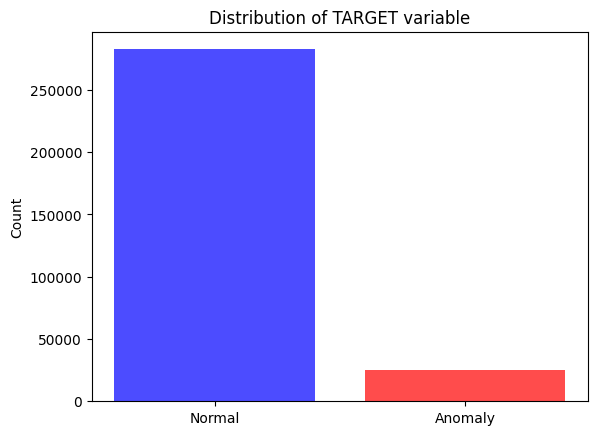

In [108]:
# Plot TARGET records 
plt.bar(y.value_counts().index, y.value_counts().values, color=['blue', 'red'], alpha=0.7)
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.ylabel('Count')
plt.title('Distribution of TARGET variable')
plt.show()

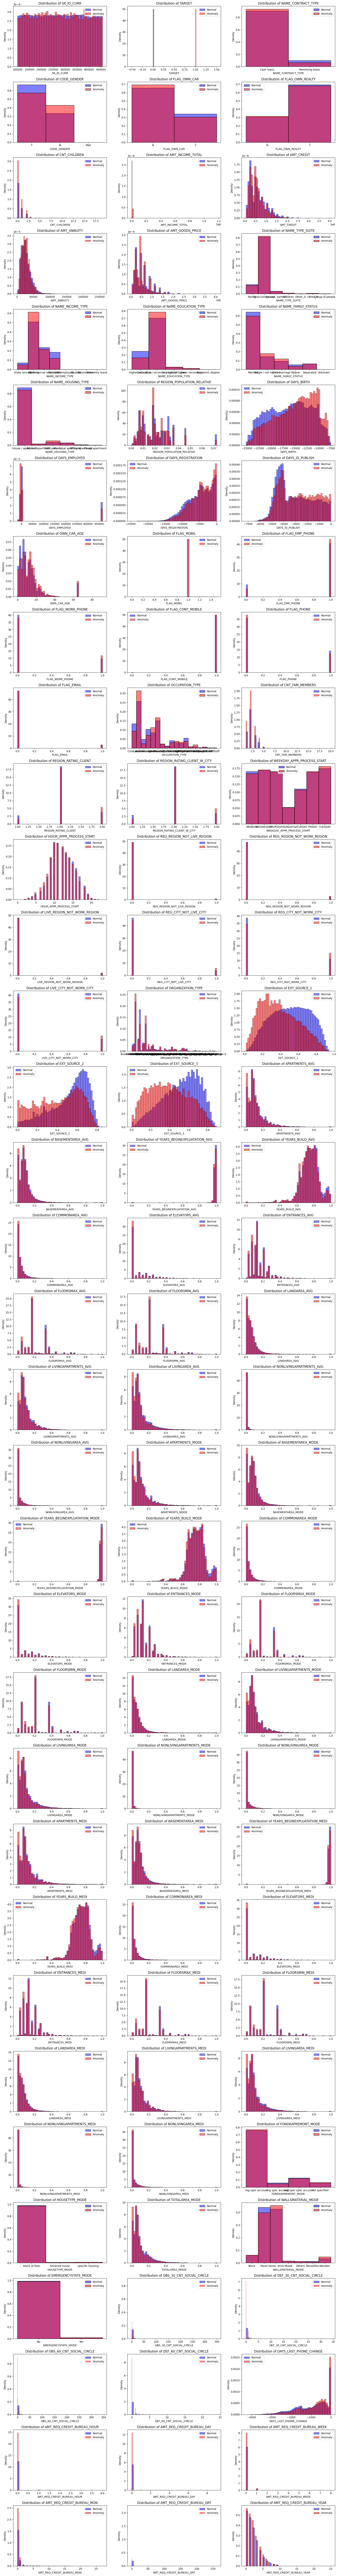

In [109]:
features = [col for col in df_application_bronze.columns if not col.startswith("FLAG_DOCUMENT")]

plot_feature_distributions(df_application_bronze, features, target_col="TARGET", bins=50, cols=3)

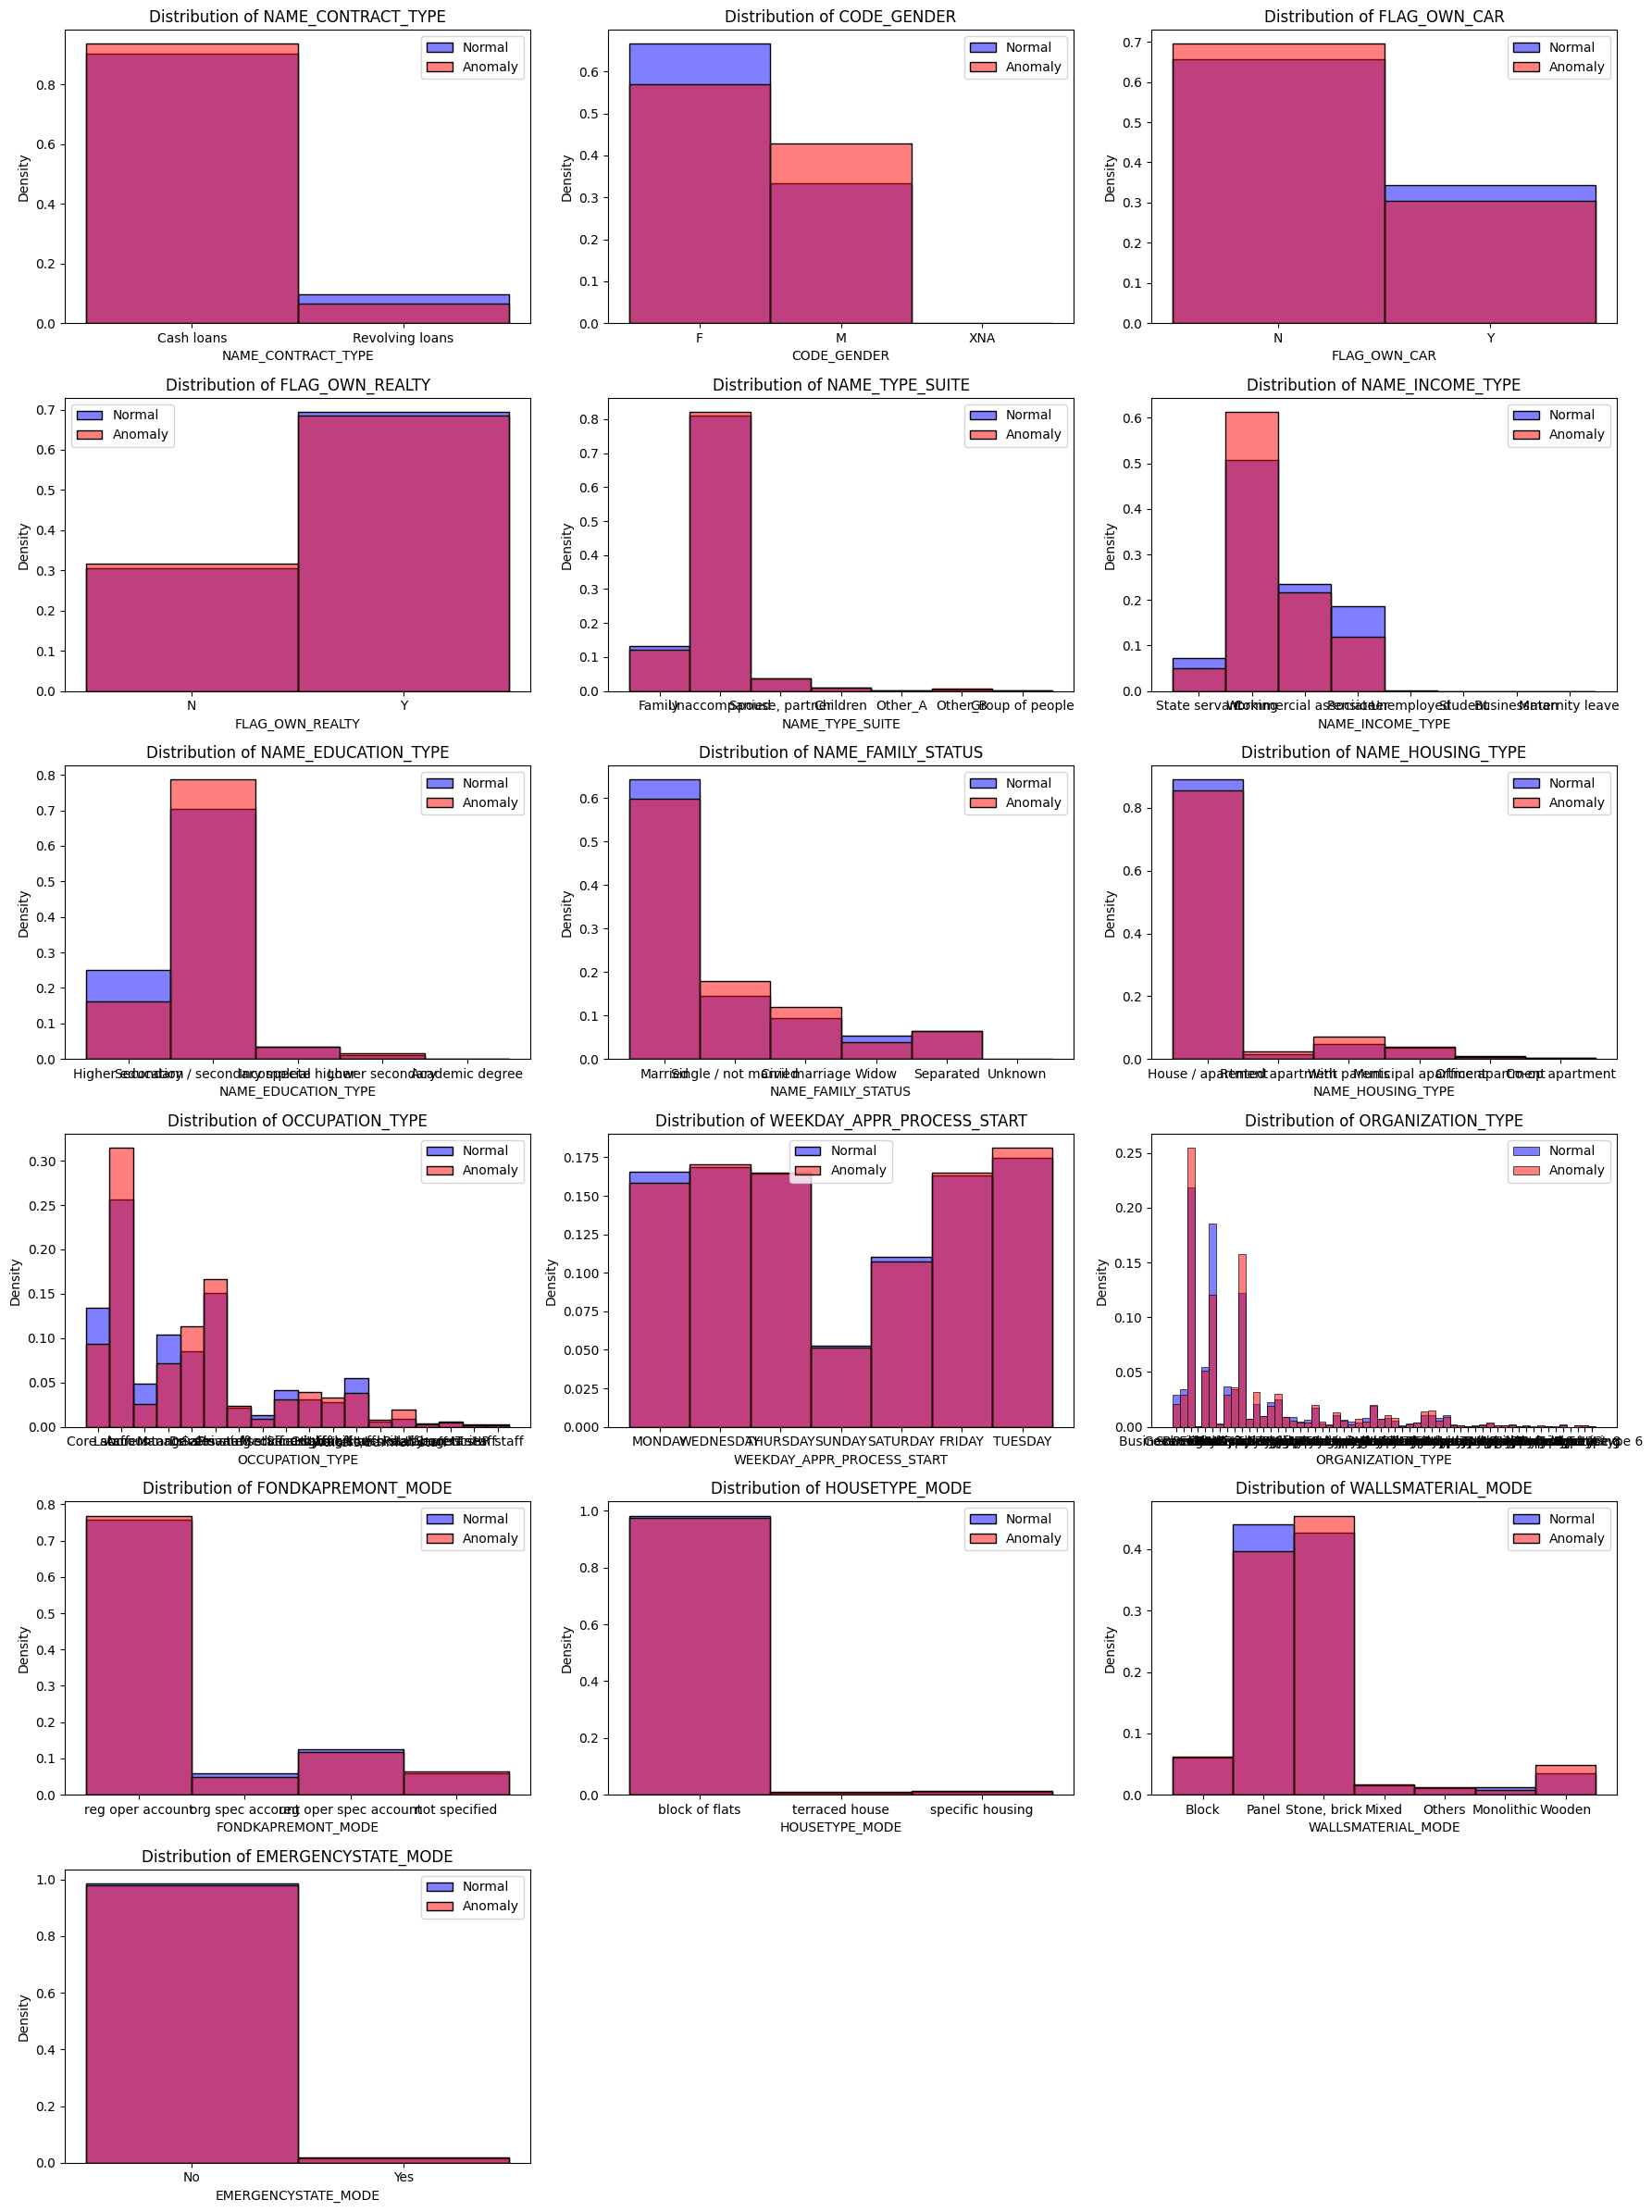

In [110]:
# get categorical features
cat_features = [col for col in df_application_bronze.select_dtypes(include=['object','category']).columns
                if not col.startswith("FLAG_DOCUMENT")]

plot_feature_distributions(df_application_bronze, cat_features, target_col="TARGET", bins=50, cols=3)

# Silver Layer

### Transform and Aggregate ( IT SHOULD BE DATA CLEANING INSTEAD -> TRANSFORM AND AGGREGATE IN GOLD)

In [111]:
# Silver Layer: Feature Engineering and Enrichment
print("\nSilver Layer: Creating New Features")

# Start with a copy of the main application data
df_silver = df_application_bronze.copy()

# 1. Feature Engineering on Numerical Columns
print("  - Engineering numerical features...")
# Convert days to years (absolute values for clarity)
df_silver['AGE_YEARS'] = abs(df_silver['DAYS_BIRTH']) / 365
df_silver['EMPLOYMENT_YEARS'] = abs(df_silver['DAYS_EMPLOYED']) / 365

# Create ratio features
df_silver['ANNUITY_INCOME_RATIO'] = df_silver['AMT_ANNUITY'] / df_silver['AMT_INCOME_TOTAL']
df_silver['CREDIT_INCOME_RATIO'] = df_silver['AMT_CREDIT'] / df_silver['AMT_INCOME_TOTAL']
df_silver['CREDIT_ANNUITY_RATIO'] = df_silver['AMT_CREDIT'] / df_silver['AMT_ANNUITY']
df_silver['EMPLOYMENT_AGE_RATIO'] = df_silver['EMPLOYMENT_YEARS'] / df_silver['AGE_YEARS']
df_silver['EMPLOYMENT_EXPERIENCE_RATIO'] = df_silver['DAYS_EMPLOYED'] / df_silver['DAYS_BIRTH']

# 2. Aggregation from previous applications
print("  - Aggregating features from previous applications...")
# Group by client ID and aggregate numerical features
prev_app_agg = df_previous_application_bronze.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['mean'],
    'DAYS_DECISION': ['max']
})

# Rename columns for clarity
prev_app_agg.columns = ['_'.join(col).strip() for col in prev_app_agg.columns.values]
prev_app_agg = prev_app_agg.reset_index()

# Merge the aggregated features with the main dataframe
df_silver = pd.merge(df_silver, prev_app_agg, on='SK_ID_CURR', how='left')

print(df_silver[['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AGE_YEARS', 'EMPLOYMENT_YEARS', 'ANNUITY_INCOME_RATIO', 'CREDIT_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO','EMPLOYMENT_AGE_RATIO', 'EMPLOYMENT_EXPERIENCE_RATIO', 'AMT_CREDIT_mean', 'AMT_CREDIT_sum']].head())


Silver Layer: Creating New Features
  - Engineering numerical features...
  - Aggregating features from previous applications...
   SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AGE_YEARS  \
0      100002       1          202500.0    406597.5  25.920548   
1      100003       0          270000.0   1293502.5  45.931507   
2      100004       0           67500.0    135000.0  52.180822   
3      100006       0          135000.0    312682.5  52.068493   
4      100007       0          121500.0    513000.0  54.608219   

   EMPLOYMENT_YEARS  ANNUITY_INCOME_RATIO  CREDIT_INCOME_RATIO  \
0          1.745205              0.121978             2.007889   
1          3.254795              0.132217             4.790750   
2          0.616438              0.100000             2.000000   
3          8.326027              0.219900             2.316167   
4          8.323288              0.179963             4.222222   

   CREDIT_ANNUITY_RATIO  EMPLOYMENT_AGE_RATIO  EMPLOYMENT_EXPERIENCE_RATIO  

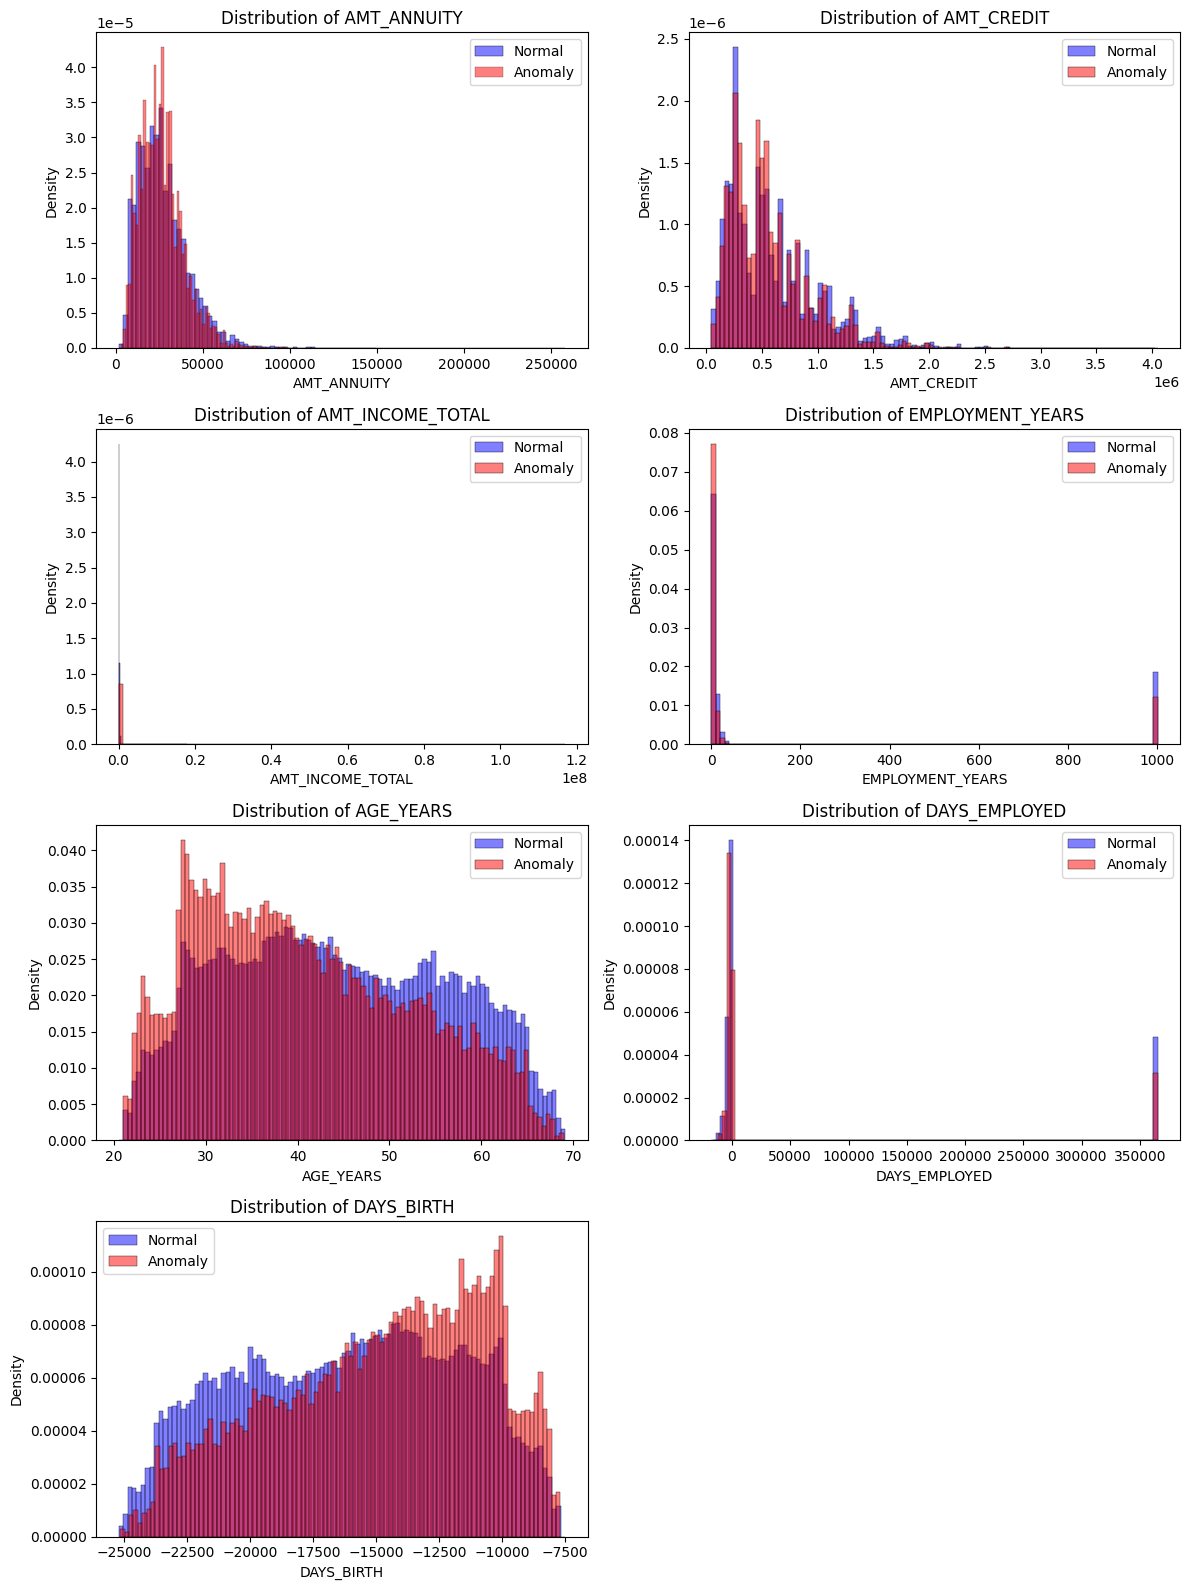

In [112]:
raw_ratio_features = [
    "AMT_ANNUITY", 
    "AMT_CREDIT",
    "AMT_INCOME_TOTAL",
    "EMPLOYMENT_YEARS",
    "AGE_YEARS",
    "DAYS_EMPLOYED",
    "DAYS_BIRTH" 
]

plot_feature_distributions(df_silver, raw_ratio_features)

In [113]:
# Make a silver dataframe with mean of flag_document columns and target

df_flag_mean = pd.DataFrame()

df_flag_mean["FLAG_DOCUMENT_MEAN"] = df_silver.filter(like='FLAG_DOCUMENT').mean(axis=1)
df_flag_mean["TARGET"] = df_silver["TARGET"]

df_flag_mean.head()

FLAG_DOCUMENT_MEAN  TARGET
0                0.05       1
1                0.05       0
2                0.00       0
3                0.05       0
4                0.05       0

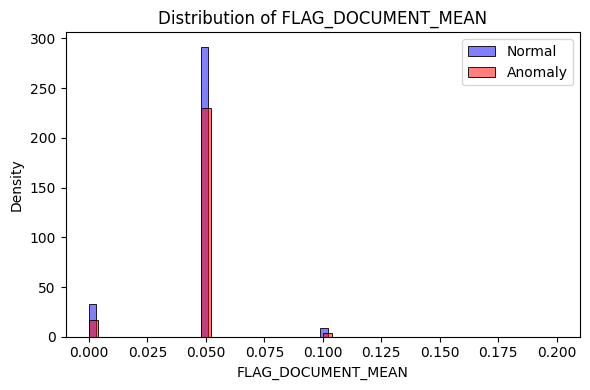

In [114]:
flag_mean_ratio_column = ['FLAG_DOCUMENT_MEAN']

plot_feature_distributions(df_flag_mean, flag_mean_ratio_column, target_col="TARGET", bins=50, cols=1)

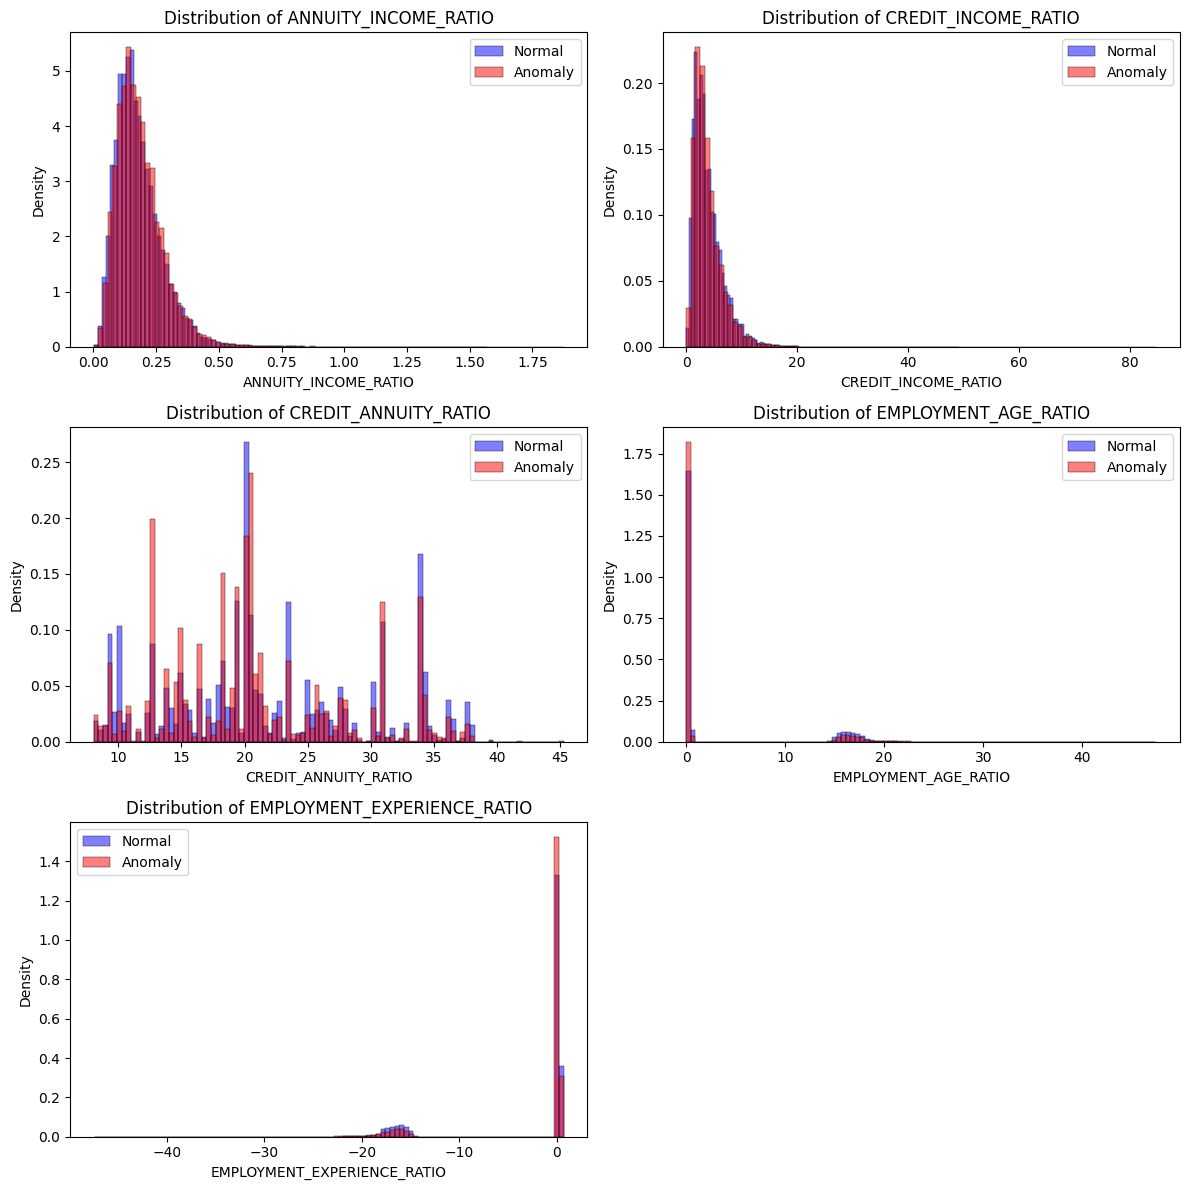

In [115]:
ratio_features = [
    'ANNUITY_INCOME_RATIO',
    'CREDIT_INCOME_RATIO',
    'CREDIT_ANNUITY_RATIO',
    'EMPLOYMENT_AGE_RATIO',
    'EMPLOYMENT_EXPERIENCE_RATIO'
]

plot_feature_distributions(df_silver, ratio_features)


In [116]:
import numpy as np

In [117]:
df_ext_sources = df_silver[
    [
    # "SK_ID_PREV", 
    # "SK_ID_CURR", 
    "EXT_SOURCE_1", 
    "EXT_SOURCE_2", 
    "EXT_SOURCE_3",
    "TARGET"
    ]
].copy()

df_ext_sources.head()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  TARGET
0      0.083037      0.262949      0.139376       1
1      0.311267      0.622246           NaN       0
2           NaN      0.555912      0.729567       0
3           NaN      0.650442           NaN       0
4           NaN      0.322738           NaN       0

In [118]:
global_rate = df_ext_sources["TARGET"].mean()

In [119]:
df_ext_sources_transformed = pd.DataFrame()

df_ext_sources["EXT_SOURCE_1_LOG"] = np.log1p(df_ext_sources["EXT_SOURCE_1"])
df_ext_sources["EXT_SOURCE_1_SQRT"] = np.sqrt(df_ext_sources["EXT_SOURCE_1"])
df_ext_sources["EXT_SOURCE_1_SQUARE"] = df_ext_sources["EXT_SOURCE_1"] ** 2
df_ext_sources["EXT_SOURCE_1_BINNED"] = pd.qcut(df_ext_sources["EXT_SOURCE_1"], q=10, labels=False)

bins = np.linspace(0, 1, 20)  # split into 20 bins
df_ext_sources["EXT_SOURCE_1_BIN"] = np.digitize(df_ext_sources["EXT_SOURCE_1"], bins)

risk_map = df_ext_sources.groupby("EXT_SOURCE_1_BIN")["TARGET"].mean() / global_rate
df_ext_sources["EXT_SOURCE_1_RISK"] = df_ext_sources["EXT_SOURCE_1_BIN"].map(risk_map)


In [120]:
df_ext_sources["EXT_SOURCE_2_LOG"] = np.log1p(df_ext_sources["EXT_SOURCE_2"])
df_ext_sources["EXT_SOURCE_2_SQRT"] = np.sqrt(df_ext_sources["EXT_SOURCE_2"])
df_ext_sources["EXT_SOURCE_2_SQUARE"] = df_ext_sources["EXT_SOURCE_2"] ** 2
df_ext_sources["EXT_SOURCE_2_BINNED"] = pd.qcut(df_ext_sources["EXT_SOURCE_2"], q=10, labels=False)

bins = np.linspace(0, 1, 20)  # split into 20 bins
df_ext_sources["EXT_SOURCE_2_BIN"] = np.digitize(df_ext_sources["EXT_SOURCE_2"], bins)

risk_map = df_ext_sources.groupby("EXT_SOURCE_2_BIN")["TARGET"].mean() / global_rate
df_ext_sources["EXT_SOURCE_2_RISK"] = df_ext_sources["EXT_SOURCE_2_BIN"].map(risk_map)

In [121]:
df_ext_sources["EXT_SOURCE_3_LOG"] = np.log1p(df_ext_sources["EXT_SOURCE_3"])
df_ext_sources["EXT_SOURCE_3_SQRT"] = np.sqrt(df_ext_sources["EXT_SOURCE_3"])
df_ext_sources["EXT_SOURCE_3_SQUARE"] = df_ext_sources["EXT_SOURCE_3"] ** 2
df_ext_sources["EXT_SOURCE_3_BINNED"] = pd.qcut(df_ext_sources["EXT_SOURCE_3"], q=10, labels=False)

bins = np.linspace(0, 1, 20)  # split into 20 bins
df_ext_sources["EXT_SOURCE_3_BIN"] = np.digitize(df_ext_sources["EXT_SOURCE_3"], bins)

risk_map = df_ext_sources.groupby("EXT_SOURCE_3_BIN")["TARGET"].mean() / global_rate
df_ext_sources["EXT_SOURCE_3_RISK"] = df_ext_sources["EXT_SOURCE_3_BIN"].map(risk_map)

In [122]:
df_ext_sources.head()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  TARGET  EXT_SOURCE_1_LOG  \
0      0.083037      0.262949      0.139376       1          0.079769   
1      0.311267      0.622246           NaN       0          0.270994   
2           NaN      0.555912      0.729567       0               NaN   
3           NaN      0.650442           NaN       0               NaN   
4           NaN      0.322738           NaN       0               NaN   

   EXT_SOURCE_1_SQRT  EXT_SOURCE_1_SQUARE  EXT_SOURCE_1_BINNED  \
0           0.288161             0.006895                  0.0   
1           0.557913             0.096887                  2.0   
2                NaN                  NaN                  NaN   
3                NaN                  NaN                  NaN   
4                NaN                  NaN                  NaN   

   EXT_SOURCE_1_BIN  EXT_SOURCE_1_RISK  EXT_SOURCE_2_LOG  EXT_SOURCE_2_SQRT  \
0                 2           2.883216          0.233449           0.512785   
1                 6           1.248871          0.483811           0.788826   
2                20           1.055328          0.442062           0.745595   
3                20           1.055328          0.501043           0.806500   
4                20           1.055328          0.279704           0.568101   

   EXT_SOURCE_2_SQUARE  EXT_SOURCE_2_BINNED  EXT_SOURCE_2_BIN  \
0             0.069142                  1.0                 5   
1             0.387190                  6.0                12   
2             0.309038                  4.0                11   
3             0.423074                  7.0                13   
4             0.104160                  1.0                 7   

   EXT_SOURCE_2_RISK  EXT_SOURCE_3_LOG  EXT_SOURCE_3_SQRT  \
0           1.616227          0.130481           0.373331   
1           0.777947               NaN                NaN   
2           0.903639          0.547871           0.854147   
3           0.632591               NaN                NaN   
4           1.368343               NaN                NaN   

   EXT_SOURCE_3_SQUARE  EXT_SOURCE_3_BINNED  EXT_SOURCE_3_BIN  \
0             0.019426                  0.0                 3   
1                  NaN                  NaN                20   
2             0.532268                  8.0                14   
3                  NaN                  NaN                20   
4                  NaN                  NaN                20   

   EXT_SOURCE_3_RISK  
0           2.554681  
1           1.153479  
2           0.451309  
3           1.153479  
4           1.153479

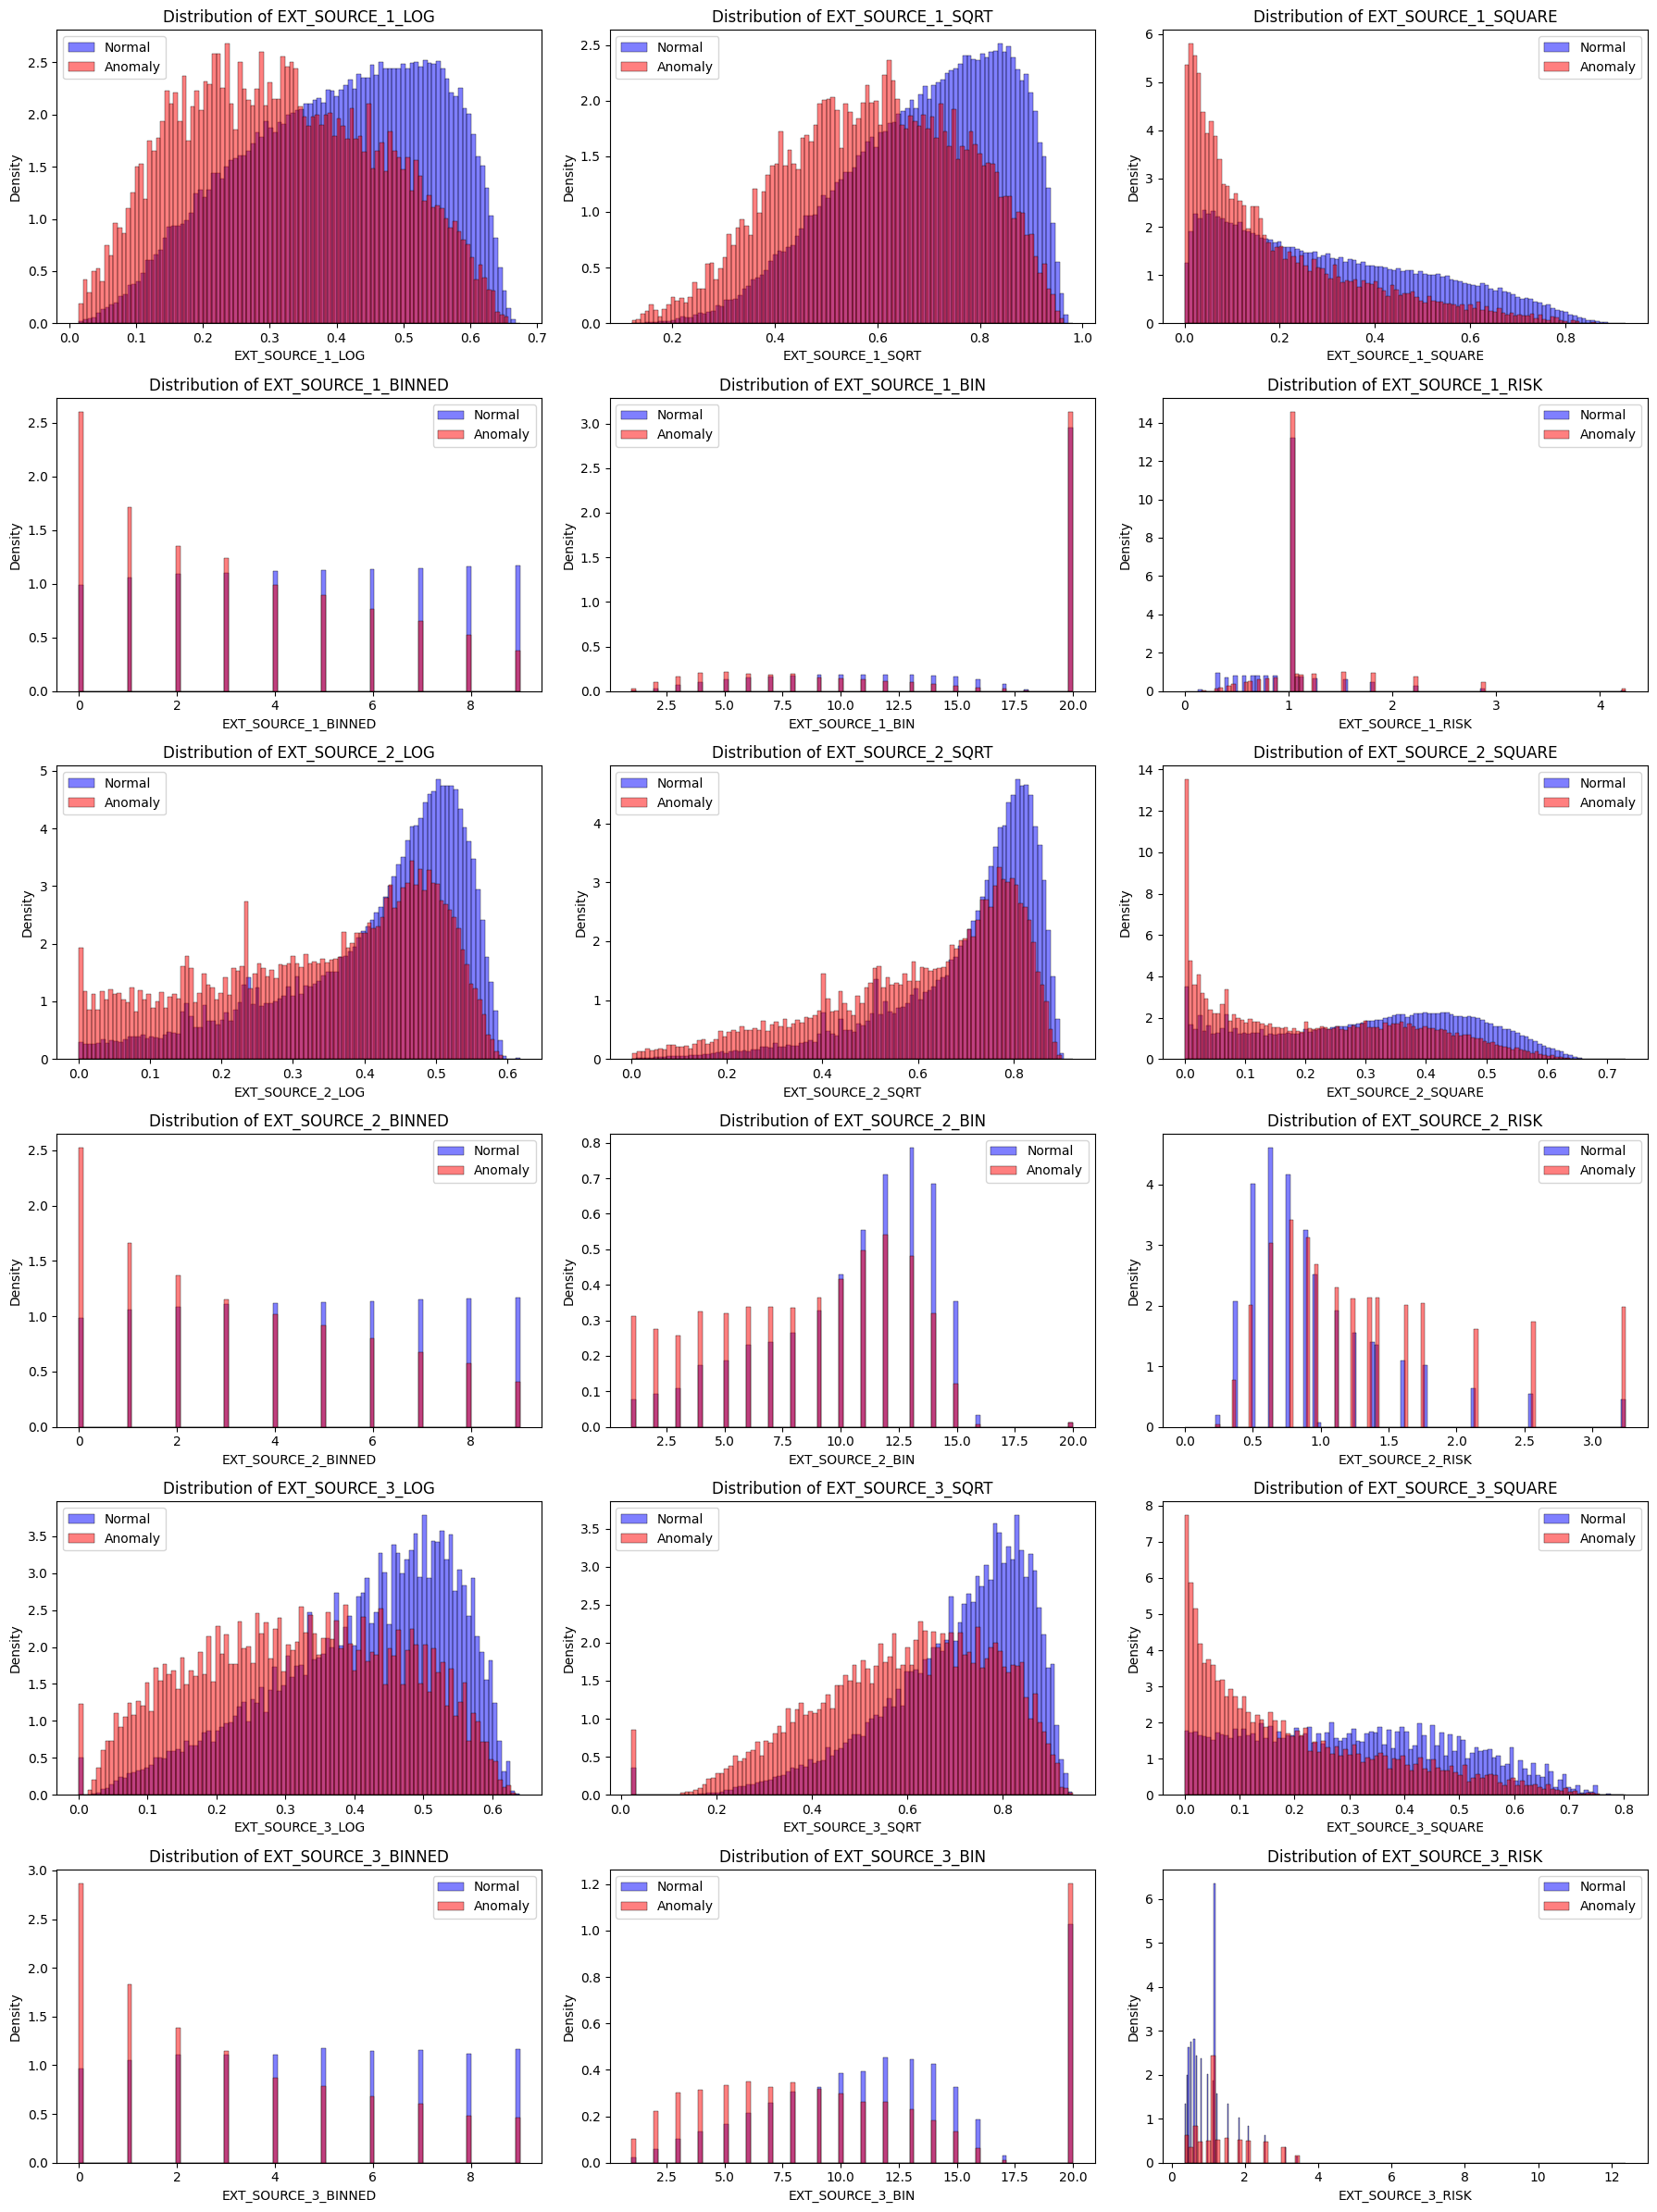

In [123]:
ext_source_features = [
    'EXT_SOURCE_1_LOG',
    'EXT_SOURCE_1_SQRT',
    'EXT_SOURCE_1_SQUARE',
    'EXT_SOURCE_1_BINNED',
    'EXT_SOURCE_1_BIN',
    'EXT_SOURCE_1_RISK',
    'EXT_SOURCE_2_LOG',
    'EXT_SOURCE_2_SQRT',
    'EXT_SOURCE_2_SQUARE',
    'EXT_SOURCE_2_BINNED',
    'EXT_SOURCE_2_BIN',
    'EXT_SOURCE_2_RISK',
    'EXT_SOURCE_3_LOG',
    'EXT_SOURCE_3_SQRT',
    'EXT_SOURCE_3_SQUARE',
    'EXT_SOURCE_3_BINNED',
    'EXT_SOURCE_3_BIN',
    'EXT_SOURCE_3_RISK'
]

plot_feature_distributions(df_ext_sources, ext_source_features, target_col="TARGET", bins=100, cols=3)

In [124]:
risk_map = df_silver.groupby("ORGANIZATION_TYPE")["TARGET"].mean() / global_rate
df_silver["ORGANIZATION_TYPE_RISK"] = df_silver["ORGANIZATION_TYPE"].map(risk_map)

risk_map = df_silver.groupby("OCCUPATION_TYPE")["TARGET"].mean() / global_rate
df_silver["OCCUPATION_TYPE_RISK"] = df_silver["OCCUPATION_TYPE"].map(risk_map)

In [125]:
df_silver[["ORGANIZATION_TYPE", "OCCUPATION_TYPE"]].head()

ORGANIZATION_TYPE OCCUPATION_TYPE
0  Business Entity Type 3        Laborers
1                  School      Core staff
2              Government        Laborers
3  Business Entity Type 3        Laborers
4                Religion      Core staff

In [126]:
df_silver[["ORGANIZATION_TYPE_RISK", "OCCUPATION_TYPE_RISK"]].head()

ORGANIZATION_TYPE_RISK  OCCUPATION_TYPE_RISK
0                1.151958              1.310408
1                0.732671              0.780880
2                0.864386              1.310408
3                1.151958              1.310408
4                0.728656              0.780880

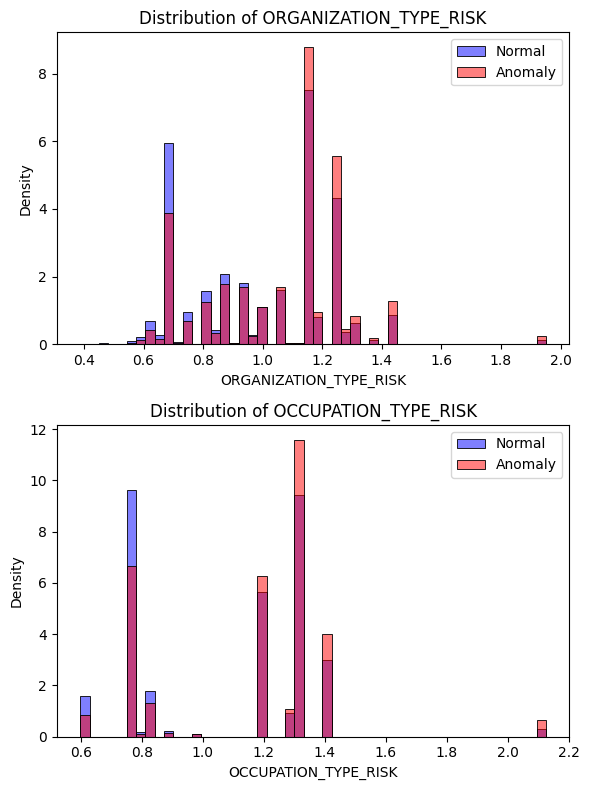

In [127]:
categoricals_for_risk = [
    "ORGANIZATION_TYPE_RISK", 
    "OCCUPATION_TYPE_RISK"
]

plot_feature_distributions(df_silver, categoricals_for_risk, target_col="TARGET", bins=50, cols=1)

In [128]:
# CREDIT_ANNUITY_RATIO × OCCUPATION_TYPE_RISK

df_silver["CREDIT_ANNUITY_OCCUPATION_RISK"] = df_silver["CREDIT_ANNUITY_RATIO"] * df_silver["OCCUPATION_TYPE_RISK"]
df_silver[["CREDIT_ANNUITY_OCCUPATION_RISK"]].head()

CREDIT_ANNUITY_OCCUPATION_RISK
0                       21.570764
1                       28.294479
2                       26.208162
3                       13.802290
4                       18.320712

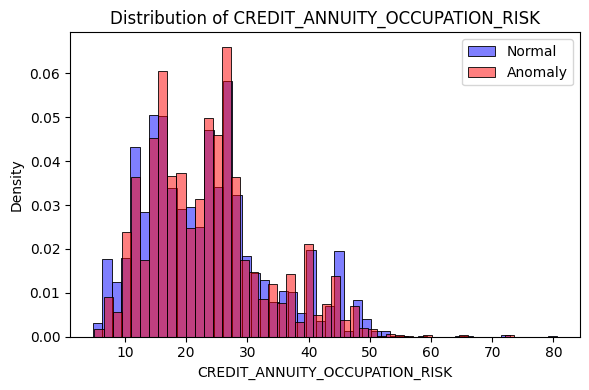

In [129]:
categoricals_for_risk = [
    "CREDIT_ANNUITY_OCCUPATION_RISK"
]

plot_feature_distributions(df_silver, categoricals_for_risk, target_col="TARGET", bins=50, cols=1)

In [130]:
# Bin CREDIT_ANNUITY_OCCUPATION_RISK

bins = np.linspace(df_silver["CREDIT_ANNUITY_OCCUPATION_RISK"].min(), df_silver["CREDIT_ANNUITY_OCCUPATION_RISK"].max(), 35)
df_silver["CREDIT_ANNUITY_OCCUPATION_RISK_BIN"] = np.digitize(df_silver["CREDIT_ANNUITY_OCCUPATION_RISK"], bins)
df_silver[["CREDIT_ANNUITY_OCCUPATION_RISK_BIN"]].head()

CREDIT_ANNUITY_OCCUPATION_RISK_BIN
0                                   8
1                                  11
2                                  10
3                                   5
4                                   7

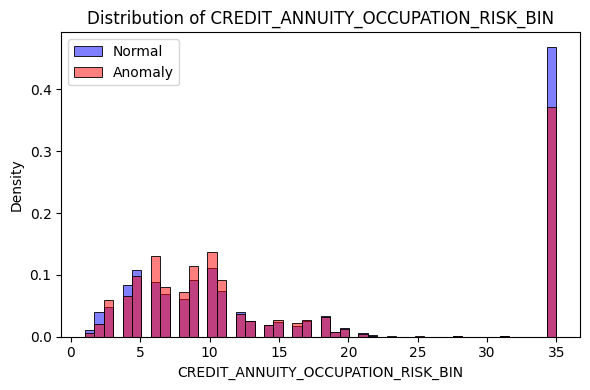

In [131]:
categoricals_for_risk = [
    "CREDIT_ANNUITY_OCCUPATION_RISK_BIN"
]

plot_feature_distributions(df_silver, categoricals_for_risk, target_col="TARGET", bins=50, cols=1)

In [132]:
# ORGANIZATION_TYPE_RISK × OCCUPATION_TYPE_RISK

df_silver["ORGANIZATION_OCCUPATION_RISK"] = df_silver["ORGANIZATION_TYPE_RISK"] * df_silver["OCCUPATION_TYPE_RISK"]
df_silver[["ORGANIZATION_OCCUPATION_RISK"]].head()

ORGANIZATION_OCCUPATION_RISK
0                      1.509536
1                      0.572128
2                      1.132698
3                      1.509536
4                      0.568993

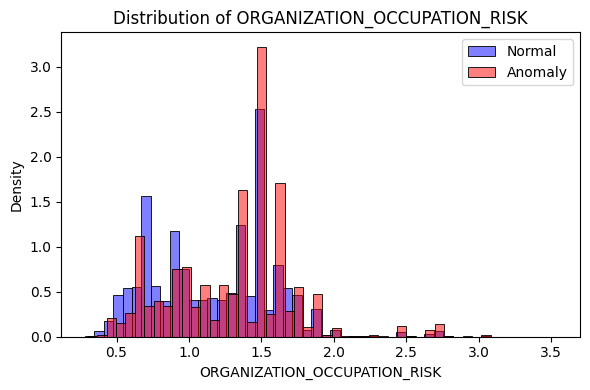

In [133]:
categoricals_for_risk = [
    "ORGANIZATION_OCCUPATION_RISK"
]

plot_feature_distributions(df_silver, categoricals_for_risk, target_col="TARGET", bins=50, cols=1)

In [134]:
# CREDIT_INCOME_RATIO × ORGANIZATION_TYPE_RISK

df_silver["CREDIT_INCOME_ORGANIZATION_RISK"] = df_silver["CREDIT_INCOME_RATIO"] * df_silver["ORGANIZATION_TYPE_RISK"]
df_silver[["CREDIT_INCOME_ORGANIZATION_RISK"]].head()

CREDIT_INCOME_ORGANIZATION_RISK
0                         2.313004
1                         3.510042
2                         1.728772
3                         2.668127
4                         3.076547

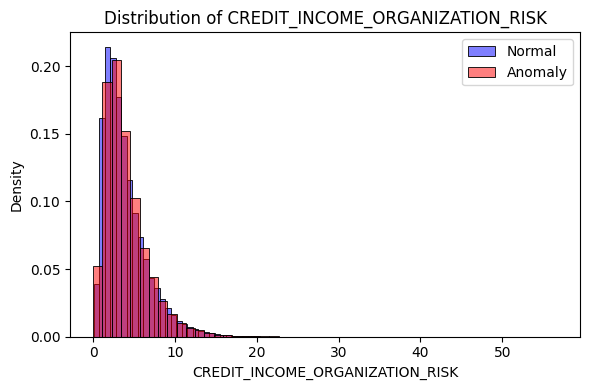

In [135]:
INCOME_ORGANIZATION_RATIO = [
    "CREDIT_INCOME_ORGANIZATION_RISK"
]

plot_feature_distributions(df_silver, INCOME_ORGANIZATION_RATIO, target_col="TARGET", bins=50, cols=1)

In [136]:
# ANNUITY_INCOME_RATIO × OCCUPATION_TYPE_RISK

df_silver["ANNUITY_INCOME_OCCUPATION_RISK"] = df_silver["ANNUITY_INCOME_RATIO"] * df_silver["OCCUPATION_TYPE_RISK"]
df_silver[["ANNUITY_INCOME_OCCUPATION_RISK"]].head()

ANNUITY_INCOME_OCCUPATION_RISK
0                        0.159841
1                        0.103245
2                        0.131041
3                        0.288159
4                        0.140530

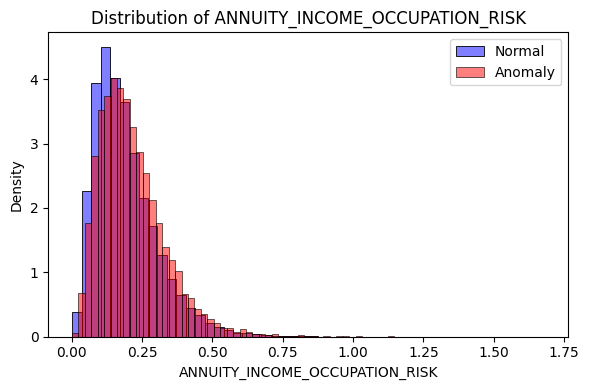

In [137]:
AUNNITY_INCOME_OCCUPATION_RISK = [
    "ANNUITY_INCOME_OCCUPATION_RISK"
]

plot_feature_distributions(df_silver, AUNNITY_INCOME_OCCUPATION_RISK, target_col="TARGET", bins=50, cols=1)

In [138]:
# CREDIT_INCOME_RATIO × CREDIT_ANNUITY_RATIO

df_silver["CREDIT_INCOME_CREDIT_ANNUITY"] = df_silver["CREDIT_INCOME_RATIO"] * df_silver["CREDIT_ANNUITY_RATIO"]
df_silver[["CREDIT_INCOME_CREDIT_ANNUITY"]].head()

CREDIT_INCOME_CREDIT_ANNUITY
0                     33.052068
1                    173.588445
2                     40.000000
3                     24.395762
4                     99.060163

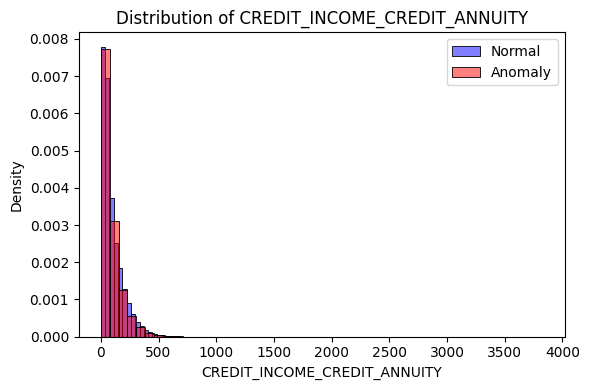

In [139]:
CREDIT_INCOME_CREDIT_ANNUITY = [
    "CREDIT_INCOME_CREDIT_ANNUITY"
]

plot_feature_distributions(df_silver, CREDIT_INCOME_CREDIT_ANNUITY, target_col="TARGET", bins=50, cols=1)

In [140]:
socal_n_credit_features = [
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE",
    "AMT_REQ_CREDIT_BUREAU_HOUR", 
    "AMT_REQ_CREDIT_BUREAU_DAY", 
    "AMT_REQ_CREDIT_BUREAU_WEEK", 
    "AMT_REQ_CREDIT_BUREAU_MON", 
    "AMT_REQ_CREDIT_BUREAU_QRT", 
    "AMT_REQ_CREDIT_BUREAU_YEAR"
]

df_silver[socal_n_credit_features].head()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0

In [141]:
# df_ext_sources["EXT_SOURCE_1_LOG"] = np.log1p(df_ext_sources["EXT_SOURCE_1"])
# df_ext_sources["EXT_SOURCE_1_SQRT"] = np.sqrt(df_ext_sources["EXT_SOURCE_1"])
# df_ext_sources["EXT_SOURCE_1_SQUARE"] = df_ext_sources["EXT_SOURCE_1"] ** 2
# df_ext_sources["EXT_SOURCE_1_BINNED"] = pd.qcut(df_ext_sources["EXT_SOURCE_1"], q=10, labels=False)

# bins = np.linspace(0, 1, 20)  # split into 20 bins
# df_ext_sources["EXT_SOURCE_1_BIN"] = np.digitize(df_ext_sources["EXT_SOURCE_1"], bins)

# risk_map = df_ext_sources.groupby("EXT_SOURCE_1_BIN")["TARGET"].mean() / global_rate
# df_ext_sources["EXT_SOURCE_1_RISK"] = df_ext_sources["EXT_SOURCE_1_BIN"].map(risk_map)

df_social = pd.DataFrame()
df_social_transformed = pd.DataFrame()

df_social[socal_n_credit_features] = df_silver[socal_n_credit_features]

for f in features:
    if "AMT_REQ_CREDIT_BUREAU" in f or "SOCIAL_CIRCLE" in f:
        df_social_transformed[f] = df_social[f].fillna(0)

df_social_transformed["DAYS_LAST_PHONE_CHANGE"] = df_social["DAYS_LAST_PHONE_CHANGE"].fillna(0)

# Transform skewed features (log1p for counts, abs-log for days)
# Counts → log1p
for f in features:
    if "AMT_REQ_CREDIT_BUREAU" in f or "SOCIAL_CIRCLE" in f:
        df_social_transformed[f+"_LOG"] = np.log1p(df_social[f])  # log(1+x) to keep zeros
        
# Days → convert to positive & log
df_social_transformed["DAYS_LAST_PHONE_CHANGE_ABS"] = df_social["DAYS_LAST_PHONE_CHANGE"].abs()
df_social_transformed["DAYS_LAST_PHONE_CHANGE_LOG"] = np.log1p(df_social_transformed["DAYS_LAST_PHONE_CHANGE_ABS"])

# Create binned versions
for f in [
    "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"
]:
    df_social_transformed[f+"_BIN"] = pd.cut(df_social[f], bins=[-1,0,2,5,100], labels=["none","low","medium","high"])
    
for f in [
    "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"
]:
    df_social_transformed[f+"_BIN"] = pd.cut(df_social[f], bins=[-1,0,2,100], labels=["none","small","large"])

df_social_transformed["DAYS_LAST_PHONE_CHANGE_BIN"] = pd.cut(df_social_transformed["DAYS_LAST_PHONE_CHANGE_ABS"], 
                                          bins=[-1,365,1095,10000], 
                                          labels=["recent","1-3yr","old"])

df_social_transformed.head()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   DAYS_LAST_PHONE_CHANGE  OBS_30_CNT_SOCIAL_CIRCLE_LOG  \
0                 -1134.0                      1.098612   
1                  -828.0                      0.693147   
2                  -815.0                      0.000000   
3                  -617.0                      1.098612   
4                 -1106.0                      0.000000   

   DEF_30_CNT_SOCIAL_CIRCLE_LOG  OBS_60_CNT_SOCIAL_CIRCLE_LOG  \
0                      1.098612                      1.098612   
1                      0.000000                      0.693147   
2                      0.000000                      0.000000   
3                      0.000000                      1.098612   
4                      0.000000                      0.000000   

   DEF_60_CNT_SOCIAL_CIRCLE_LOG  AMT_REQ_CREDIT_BUREAU_HOUR_LOG  \
0                      1.098612                             0.0   
1                      0.000000                             0.0   
2                      0.000000                             0.0   
3                      0.000000                             NaN   
4                      0.000000                             0.0   

   AMT_REQ_CREDIT_BUREAU_DAY_LOG  AMT_REQ_CREDIT_BUREAU_WEEK_LOG  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            NaN                             NaN   
4                            0.0                             0.0   

   AMT_REQ_CREDIT_BUREAU_MON_LOG  AMT_REQ_CREDIT_BUREAU_QRT_LOG  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            NaN                            NaN   
4                            0.0                            0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR_LOG  DAYS_LAST_PHONE_CHANGE_ABS  \
0                        0.693147                      1134.0   
1                        0.000000                       828.0   
2                        0.000000                       815.0   
3            

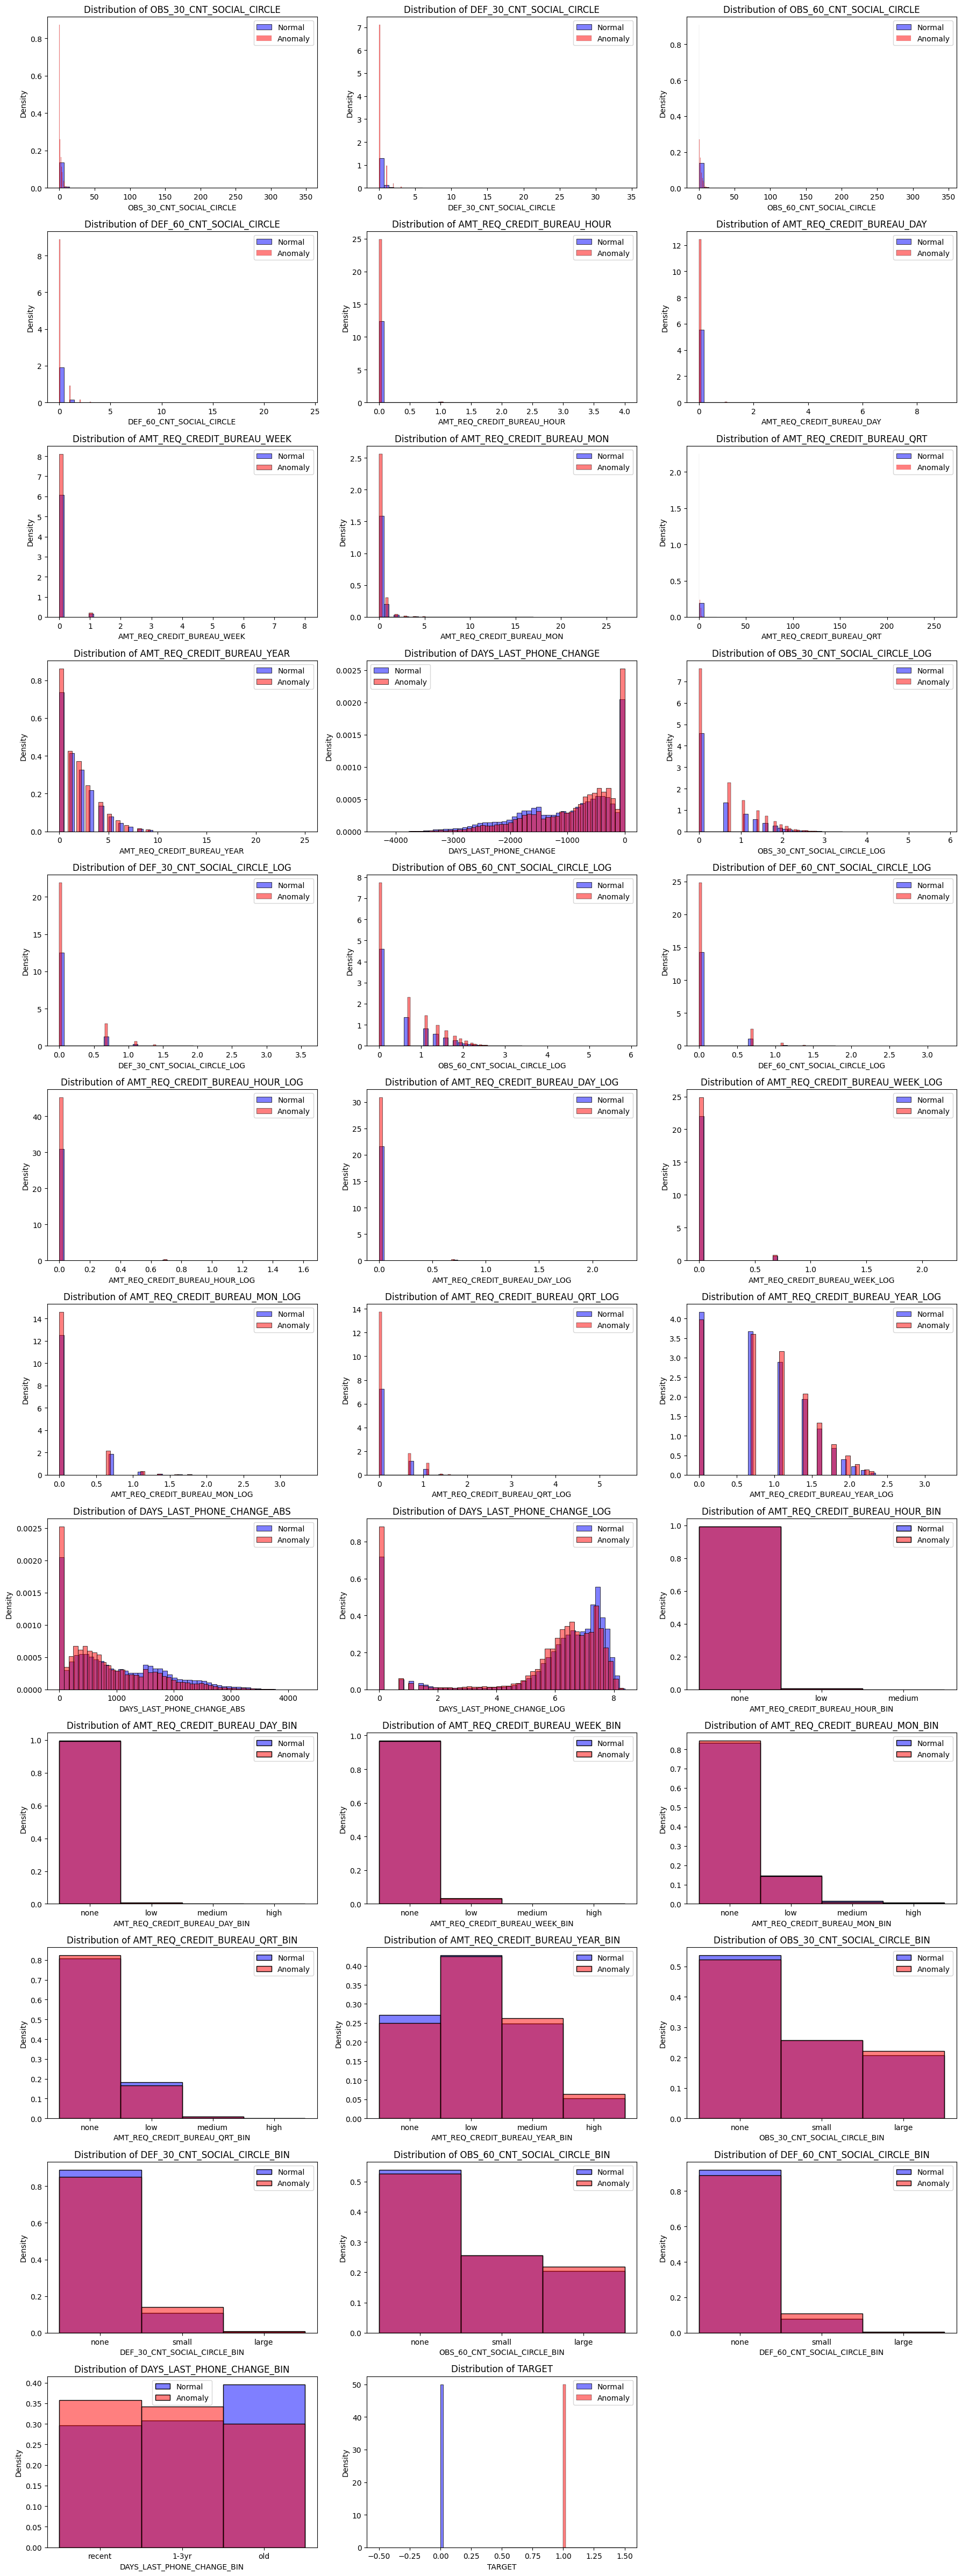

In [142]:
social_circle_features = [
    df_social_transformed.columns.tolist()
]

df_social_transformed["TARGET"] = df_silver["TARGET"]
plot_feature_distributions(df_social_transformed, df_social_transformed.columns.tolist(), target_col="TARGET", bins=50, cols=3)

In [143]:
from scipy.stats import ks_2samp, chi2_contingency
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

def evaluate_feature_goodness(df, features, target_col="is_anomaly"):
    results = []

    for feature in features:
        try:
            data = df[[feature, target_col]].dropna()
            
            # Separate groups
            normal = data[data[target_col] == 0][feature]
            anomaly = data[data[target_col] == 1][feature]

            # Case 1: Numeric features
            if pd.api.types.is_numeric_dtype(data[feature]):
                # KS test
                ks_stat, ks_pvalue = ks_2samp(normal, anomaly)

                # AUROC
                try:
                    auc = roc_auc_score(data[target_col], data[feature])
                except Exception:
                    auc = np.nan

                results.append({
                    "feature": feature,
                    "type": "numeric",
                    "ks_stat": ks_stat,
                    "ks_pvalue": ks_pvalue,
                    "auc": auc,
                    "normal_mean": normal.mean(),
                    "anomaly_mean": anomaly.mean()
                })

            # Case 2: Categorical features
            else:
                # Build contingency table
                contingency = pd.crosstab(data[feature], data[target_col])
                chi2, pval, dof, exp = chi2_contingency(contingency)

                # Simple proxy "auc": how well target rate differs across categories
                target_means = data.groupby(feature)[target_col].mean()
                auc_proxy = target_means.max() - target_means.min()

                results.append({
                    "feature": feature,
                    "type": "categorical",
                    "chi2": chi2,
                    "chi2_pvalue": pval,
                    "auc_proxy": auc_proxy,
                    "normal_dist": normal.value_counts(normalize=True).to_dict(),
                    "anomaly_dist": anomaly.value_counts(normalize=True).to_dict()
                })

        except Exception as e:
            print(f"Skipping {feature} due to error: {e}")

    return pd.DataFrame(results)


In [144]:
# set pandas to display all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


In [145]:
df_silver[["CREDIT_ANNUITY_RATIO",
    "AMT_INCOME_TOTAL",
    "CREDIT_ANNUITY_OCCUPATION_RISK",
    "CREDIT_ANNUITY_OCCUPATION_RISK_BIN",
    "ORGANIZATION_TYPE_RISK",
    "OCCUPATION_TYPE_RISK",
    "ORGANIZATION_OCCUPATION_RISK",
    "ORGANIZATION_TYPE",
    "OCCUPATION_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE"]].head()

CREDIT_ANNUITY_RATIO  AMT_INCOME_TOTAL  CREDIT_ANNUITY_OCCUPATION_RISK  \
0             16.461104          202500.0                       21.570764   
1             36.234085          270000.0                       28.294479   
2             20.000000           67500.0                       26.208162   
3             10.532818          135000.0                       13.802290   
4             23.461618          121500.0                       18.320712   

   CREDIT_ANNUITY_OCCUPATION_RISK_BIN  ORGANIZATION_TYPE_RISK  \
0                                   8                1.151958   
1                                  11                0.732671   
2                                  10                0.864386   
3                                   5                1.151958   
4                                   7                0.728656   

   OCCUPATION_TYPE_RISK  ORGANIZATION_OCCUPATION_RISK       ORGANIZATION_TYPE  \
0              1.310408                      1.509536  Business Entity Type 3   
1              0.780880                      0.572128                  School   
2              1.310408                      1.132698              Government   
3              1.310408                      1.509536  Business Entity Type 3   
4              0.780880                      0.568993                Religion   

  OCCUPATION_TYPE            NAME_EDUCATION_TYPE NAME_INCOME_TYPE  
0        Laborers  Secondary / secondary special          Working  
1      Core staff               Higher education    State servant  
2        Laborers  Secondary / secondary special          Working  
3        Laborers  Secondary / secondary special          Working  
4      Core staff  Secondary / secondary special          Working

In [146]:
features = [
    "CREDIT_ANNUITY_RATIO",
    "AMT_INCOME_TOTAL",
    "CREDIT_ANNUITY_OCCUPATION_RISK",
    "CREDIT_ANNUITY_OCCUPATION_RISK_BIN",
    "ORGANIZATION_TYPE_RISK",
    "OCCUPATION_TYPE_RISK",
    "ORGANIZATION_OCCUPATION_RISK",
    "ORGANIZATION_TYPE",
    "OCCUPATION_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE"
]

results = evaluate_feature_goodness(df_silver, features, target_col="TARGET")
print(results)

                               feature         type   ks_stat      ks_pvalue  \
0                 CREDIT_ANNUITY_RATIO      numeric  0.094598  3.434224e-178   
1                     AMT_INCOME_TOTAL      numeric  0.037375   3.913655e-28   
2       CREDIT_ANNUITY_OCCUPATION_RISK      numeric  0.063965   1.271809e-60   
3   CREDIT_ANNUITY_OCCUPATION_RISK_BIN      numeric  0.070053   7.967952e-98   
4               ORGANIZATION_TYPE_RISK      numeric  0.116168  9.164815e-269   
5                 OCCUPATION_TYPE_RISK      numeric  0.130725  1.529302e-252   
6         ORGANIZATION_OCCUPATION_RISK      numeric  0.136048  1.406420e-273   
7                    ORGANIZATION_TYPE  categorical       NaN            NaN   
8                      OCCUPATION_TYPE  categorical       NaN            NaN   
9                  NAME_EDUCATION_TYPE  categorical       NaN            NaN   
10                    NAME_INCOME_TYPE  categorical       NaN            NaN   

         auc    normal_mean   anomaly_m

In [147]:
dummy_df = pd.DataFrame()

dummy_df = results.sort_values(by="auc", ascending=False)
dummy_df.head()

feature     type   ks_stat      ks_pvalue       auc  \
6    ORGANIZATION_OCCUPATION_RISK  numeric  0.136048  1.406420e-273  0.590868   
5            OCCUPATION_TYPE_RISK  numeric  0.130725  1.529302e-252  0.576818   
4          ORGANIZATION_TYPE_RISK  numeric  0.116168  9.164815e-269  0.574274   
2  CREDIT_ANNUITY_OCCUPATION_RISK  numeric  0.063965   1.271809e-60  0.517082   
1                AMT_INCOME_TOTAL  numeric  0.037375   3.913655e-28  0.480861   

     normal_mean   anomaly_mean  chi2  chi2_pvalue  auc_proxy normal_dist  \
6       1.176945       1.314939   NaN          NaN        NaN         NaN   
5       1.080986       1.163296   NaN          NaN        NaN         NaN   
4       0.994767       1.059590   NaN          NaN        NaN         NaN   
2      23.195835      23.555722   NaN          NaN        NaN         NaN   
1  169077.722266  165611.760906   NaN          NaN        NaN         NaN   

  anomaly_dist  
6          NaN  
5          NaN  
4          NaN  
2          NaN  
1          NaN

In [148]:
print(results)

                               feature         type   ks_stat      ks_pvalue  \
0                 CREDIT_ANNUITY_RATIO      numeric  0.094598  3.434224e-178   
1                     AMT_INCOME_TOTAL      numeric  0.037375   3.913655e-28   
2       CREDIT_ANNUITY_OCCUPATION_RISK      numeric  0.063965   1.271809e-60   
3   CREDIT_ANNUITY_OCCUPATION_RISK_BIN      numeric  0.070053   7.967952e-98   
4               ORGANIZATION_TYPE_RISK      numeric  0.116168  9.164815e-269   
5                 OCCUPATION_TYPE_RISK      numeric  0.130725  1.529302e-252   
6         ORGANIZATION_OCCUPATION_RISK      numeric  0.136048  1.406420e-273   
7                    ORGANIZATION_TYPE  categorical       NaN            NaN   
8                      OCCUPATION_TYPE  categorical       NaN            NaN   
9                  NAME_EDUCATION_TYPE  categorical       NaN            NaN   
10                    NAME_INCOME_TYPE  categorical       NaN            NaN   

         auc    normal_mean   anomaly_m

In [149]:
ext_src_features = [
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "EXT_SOURCE_1_LOG",
    "EXT_SOURCE_1_SQRT",
    "EXT_SOURCE_1_SQUARE",
    "EXT_SOURCE_1_BINNED",
    "EXT_SOURCE_1_BIN",
    "EXT_SOURCE_1_RISK",
    "EXT_SOURCE_2_LOG",
    "EXT_SOURCE_2_SQRT",
    "EXT_SOURCE_2_SQUARE",
    "EXT_SOURCE_2_BINNED",
    "EXT_SOURCE_2_BIN",
    "EXT_SOURCE_2_RISK",
    "EXT_SOURCE_3_LOG",
    "EXT_SOURCE_3_SQRT",
    "EXT_SOURCE_3_SQUARE",
    "EXT_SOURCE_3_BINNED",
    "EXT_SOURCE_3_BIN",
    "EXT_SOURCE_3_RISK"
]

results = evaluate_feature_goodness(df_ext_sources, ext_src_features, target_col="TARGET")
print(results)

                feature     type   ks_stat      ks_pvalue       auc  \
0          EXT_SOURCE_1  numeric  0.242696   0.000000e+00  0.334319   
1          EXT_SOURCE_2  numeric  0.223739   0.000000e+00  0.343880   
2          EXT_SOURCE_3  numeric  0.269812   0.000000e+00  0.320600   
3      EXT_SOURCE_1_LOG  numeric  0.242696   0.000000e+00  0.334319   
4     EXT_SOURCE_1_SQRT  numeric  0.242696   0.000000e+00  0.334319   
5   EXT_SOURCE_1_SQUARE  numeric  0.242696   0.000000e+00  0.334319   
6   EXT_SOURCE_1_BINNED  numeric  0.240142   0.000000e+00  0.337419   
7      EXT_SOURCE_1_BIN  numeric  0.085641  4.544339e-146  0.487661   
8     EXT_SOURCE_1_RISK  numeric  0.119575  8.785998e-285  0.589005   
9      EXT_SOURCE_2_LOG  numeric  0.223739   0.000000e+00  0.343880   
10    EXT_SOURCE_2_SQRT  numeric  0.223739   0.000000e+00  0.343880   
11  EXT_SOURCE_2_SQUARE  numeric  0.223739   0.000000e+00  0.343880   
12  EXT_SOURCE_2_BINNED  numeric  0.221739   0.000000e+00  0.346914   
13    

In [150]:
social_features = [
    df_social_transformed.columns.tolist()
]

results = evaluate_feature_goodness(df_social_transformed, df_social_transformed.columns.tolist(), target_col="TARGET")

#add results to dataframe
results_social_df = pd.DataFrame(results)

#display df and sort by auc
results_social_df = results_social_df.sort_values(by="auc", ascending=False)
results_social_df

C:\Users\andre\AppData\Local\Temp\ipykernel_131636\3465830604.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_means = data.groupby(feature)[target_col].mean()
C:\Users\andre\AppData\Local\Temp\ipykernel_131636\3465830604.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_means = data.groupby(feature)[target_col].mean()
C:\Users\andre\AppData\Local\Temp\ipykernel_131636\3465830604.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

Skipping TARGET due to error: Data must be 1-dimensional, got ndarray of shape (307511, 2) instead


feature         type   ks_stat      ks_pvalue  \
10          DAYS_LAST_PHONE_CHANGE      numeric  0.096799  1.419169e-186   
20  AMT_REQ_CREDIT_BUREAU_YEAR_LOG      numeric  0.035049   1.170992e-20   
1         DEF_30_CNT_SOCIAL_CIRCLE      numeric  0.037338   4.438492e-28   
12    DEF_30_CNT_SOCIAL_CIRCLE_LOG      numeric  0.037165   8.869947e-28   
3         DEF_60_CNT_SOCIAL_CIRCLE      numeric  0.031318   7.021305e-20   
14    DEF_60_CNT_SOCIAL_CIRCLE_LOG      numeric  0.031197   1.064941e-19   
0         OBS_30_CNT_SOCIAL_CIRCLE      numeric  0.016296   1.077484e-05   
2         OBS_60_CNT_SOCIAL_CIRCLE      numeric  0.016210   1.222853e-05   
11    OBS_30_CNT_SOCIAL_CIRCLE_LOG      numeric  0.015698   2.625960e-05   
13    OBS_60_CNT_SOCIAL_CIRCLE_LOG      numeric  0.015619   2.942836e-05   
9       AMT_REQ_CREDIT_BUREAU_YEAR      numeric  0.011691   3.873436e-03   
16   AMT_REQ_CREDIT_BUREAU_DAY_LOG      numeric  0.001375   1.000000e+00   
5        AMT_REQ_CREDIT_BUREAU_DAY      numeric  0.000911   1.000000e+00   
17  AMT_REQ_CREDIT_BUREAU_WEEK_LOG      numeric  0.000479   1.000000e+00   
15  AMT_REQ_CREDIT_BUREAU_HOUR_LOG      numeric  0.000289   1.000000e+00   
4       AMT_REQ_CREDIT_BUREAU_HOUR      numeric  0.000035   1.000000e+00   
6       AMT_REQ_CREDIT_BUREAU_WEEK      numeric  0.000925   1.000000e+00   
18   AMT_REQ_CREDIT_BUREAU_MON_LOG      numeric  0.008507   1.280861e-01   
19   AMT_REQ_CREDIT_BUREAU_QRT_LOG      numeric  0.014571   6.345465e-04   
7        AMT_REQ_CREDIT_BUREAU_MON      numeric  0.013786   3.385130e-04   
8        AMT_REQ_CREDIT_BUREAU_QRT      numeric  0.019932   2.629384e-08   
21      DAYS_LAST_PHONE_CHANGE_ABS      numeric  0.096801  1.399886e-186   
22      DAYS_LAST_PHONE_CHANGE_LOG      numeric  0.096801  1.399886e-186   
23  AMT_REQ_CREDIT_BUREAU_HOUR_BIN  categorical       NaN            NaN   
24   AMT_REQ_CREDIT_BUREAU_DAY_BIN  categorical       NaN            NaN   
25  AMT_REQ_CREDIT_BUREAU_WEEK_BIN  categorical       NaN            NaN   
26   AMT_REQ_CREDIT_BUREAU_MON_BIN  categorical       NaN            NaN   
27   AMT_REQ_CREDIT_BUREAU_QRT_BIN  categorical       NaN            NaN   
28  AMT_REQ_CREDIT_BUREAU_YEAR_BIN  categorical       NaN            NaN   
29    OBS_30_CNT_SOCIAL_CIRCLE_BIN  categorical       NaN            NaN   
30    DEF_30_CNT_SOCIAL_CIRCLE_BIN  categorical       NaN            NaN   
31    OBS_60_CNT_SOCIAL_CIRCLE_BIN  categorical       NaN            NaN   
32    DEF_60_CNT_SOCIAL_CIRCLE_BIN  categorical       NaN            NaN   
33      DAYS_LAST_PHONE_CHANGE_BIN  categorical       NaN            NaN   

         auc  normal_mean  anomaly_mean        chi2    chi2_pvalue  auc_proxy  \
10  0.556862  -976.384840   -808.796818         NaN            NaN        NaN   
20  0.520596     0.860339      0.907393         NaN            NaN        NaN   
1   0.518926     0.138663      0.191702         NaN            NaN        NaN   
12  0.518840     0.087734      0.119325         NaN            NaN        NaN   
3   0.515795     0.096351      0.138046         NaN            NaN        NaN   
14  0.515736     0.062259      0.087795         NaN            NaN        NaN   
0   0.509556     1.410809      1.493978         NaN            NaN        NaN   
2   0.509396     1.394049      1.475529         NaN            NaN        NaN   
11  0.509105     0.578910      0.605095         NaN            NaN        NaN   
13  0.508947     0.573951      0.599708         NaN            NaN        NaN   
9   0.500994     1.640410      1.678026         NaN            NaN        NaN   
16  0.500687     0.004271      0.005178         NaN            NaN        NaN   
5   0.500455     0.006003      0.006647         NaN            NaN        NaN   
17  0.500243     0.022958      0.023373         NaN            NaN        NaN   
15  0.500145     0.004333      0.004541         NaN            NaN        NaN   
4   0.499994     0.005540      0.005519         NaN            NaN    

### Relevant features discovered:
- CREDIT_ANNUITY_RATIO
- AMT_INCOME_TOTAL

- CREDIT_ANNUITY_OCCUPATION_RISK
- CREDIT_ANNUITY_OCCUPATION_RISK_BIN

- ORGANIZATION_TYPE_RISK
- OCCUPATION_TYPE_RISK

- ORGANIZATION_OCCUPATION_RISK

##### CATEGORICAL 

- ORGANIZATION_TYPE-> from 0.025 to 0.15 
- OCCUPATION_TYPE -> from 0.40 to 0.175 
- NAME_EDUCATION_TYPE -> from 0.02 to 0.10 
- NAME_INCOME_TYPE -> from 0.0 to 0.4


### EXT Features
(raw numeric)
- EXT_SOURCE_1, 
- EXT_SOURCE_2, 
- EXT_SOURCE_3 

- EXT_SOURCE_1_RISK, 
- EXT_SOURCE_2_RISK, 
- EXT_SOURCE_3_RISK 


### Features to use
- ORGANIZATION_OCCUPATION_RISK 
- OCCUPATION_TYPE_RISK 
- ORGANIZATION_TYPE_RISK 
- CREDIT_ANNUITY_OCCUPATION_RISK
- EXT_SOURCE_1, 
- EXT_SOURCE_2, 
- EXT_SOURCE_3 

- EXT_SOURCE_1_RISK, 
- EXT_SOURCE_2_RISK, 
- EXT_SOURCE_3_RISK 

- DAYS_LAST_PHONE_CHANGE
- AMT_REQ_CREDIT_BUREAU_YEAR_LOG
- DEF_30_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE_LOG
- DEF_60_CNT_SOCIAL_CIRCLE_LOG

- DAYS_LAST_PHONE_CHANGE_BIN
- DEF_30_CNT_SOCIAL_CIRCLE_BIN
- DEF_60_CNT_SOCIAL_CIRCLE_BIN
- AMT_REQ_CREDIT_BUREAU_YEAR_BIN
- AMT_REQ_CREDIT_BUREAU_QRT_BIN
- AMT_REQ_CREDIT_BUREAU_MON_BIN


# Gold Layer

In [151]:
df_silver.drop(columns=["ANNUITY_INCOME_RATIO", "CREDIT_INCOME_RATIO", "EMPLOYMENT_AGE_RATIO", "EMPLOYMENT_EXPERIENCE_RATIO" ], inplace=True)
df_silver.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [152]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [153]:
df_gold = pd.DataFrame()

In [154]:
# Gold Layer: Final Model-Ready Data 
df_gold = df_silver[[
    "ORGANIZATION_OCCUPATION_RISK",
    "OCCUPATION_TYPE_RISK",
    "ORGANIZATION_TYPE_RISK",
    "CREDIT_ANNUITY_OCCUPATION_RISK"
]].copy()

df_gold = df_gold.join(
    df_ext_sources[[
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
        "EXT_SOURCE_1_RISK",
        "EXT_SOURCE_2_RISK",
        "EXT_SOURCE_3_RISK"
    ]],
    how="left"
)

df_gold = df_gold.join( # -> these features lower accuracy
    df_social_transformed[[
        #Numerical
        
        # "DAYS_LAST_PHONE_CHANGE",
        # "AMT_REQ_CREDIT_BUREAU_YEAR_LOG",
        # "DEF_30_CNT_SOCIAL_CIRCLE",
        # "DEF_60_CNT_SOCIAL_CIRCLE",
        # "DEF_30_CNT_SOCIAL_CIRCLE_LOG",
        # "DEF_60_CNT_SOCIAL_CIRCLE_LOG",
        
        #Categorical
        
        # "DAYS_LAST_PHONE_CHANGE_BIN",
        # "DEF_30_CNT_SOCIAL_CIRCLE_BIN",
        # "DEF_60_CNT_SOCIAL_CIRCLE_BIN",
        # "AMT_REQ_CREDIT_BUREAU_YEAR_BIN",
        # "AMT_REQ_CREDIT_BUREAU_QRT_BIN",
        # "AMT_REQ_CREDIT_BUREAU_MON_BIN"
    ]],
    how="left"
)

df_gold["TARGET"] = df_silver["TARGET"]

# 1. Handle Categorical Features
print("\n Gold Layer: Handling Categorical Features ")
# Use one-hot encoding for categorical columns
categorical_cols = [col for col in df_gold.columns if df_gold[col].dtype == "object"]
if categorical_cols:
    df_gold = pd.get_dummies(df_gold, columns=categorical_cols, dummy_na=False)

df_gold.head()


 Gold Layer: Handling Categorical Features 


ORGANIZATION_OCCUPATION_RISK  OCCUPATION_TYPE_RISK  ORGANIZATION_TYPE_RISK  \
0                      1.509536              1.310408                1.151958   
1                      0.572128              0.780880                0.732671   
2                      1.132698              1.310408                0.864386   
3                      1.509536              1.310408                1.151958   
4                      0.568993              0.780880                0.728656   

   CREDIT_ANNUITY_OCCUPATION_RISK  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       21.570764      0.083037      0.262949      0.139376   
1                       28.294479      0.311267      0.622246           NaN   
2                       26.208162           NaN      0.555912      0.729567   
3                       13.802290           NaN      0.650442           NaN   
4                       18.320712           NaN      0.322738           NaN   

   EXT_SOURCE_1_RISK  EXT_SOURCE_2_RISK  EXT_SOURCE_3_RISK  TARGET  
0           2.883216           1.616227           2.554681       1  
1           1.248871           0.777947           1.153479       0  
2           1.055328           0.903639           0.451309       0  
3           1.055328           0.632591           1.153479       0  
4           1.055328           1.368343           1.153479       0

In [155]:
# Select Features and Target
print("  - Selecting features and target...")
# Separate features (X) from the target (y)
X = df_gold.drop(['TARGET'], axis=1) # Exclude TARGET and ID for unsupervised model training
y = df_gold['TARGET'] # Save TARGET for later evaluation

  - Selecting features and target...


In [ ]:
# Add missingness indicators

# TODO: - HANDLE THE MISSING VALUES INSIDE THE TABLE THEN ASSING TO X
for col in X.columns:
    if X[col].isna().any():
        X[f"{col}_missing"] = X[col].isna().astype(int)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Gold Layer: Data Ready for Model Training")
print(f"  - Features (X_scaled): {X_scaled.shape}")
print(f"  - Target (y): {y.shape}")

Gold Layer: Data Ready for Model Training
  - Features (X_scaled): (307511, 16)
  - Target (y): (307511,)


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# X_scaled: The standardized feature data
# y: The target variable (TARGET) for evaluation

# Split the data 
X_train_scaled, X_test_scaled, _, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
fraud_rate = y.value_counts()[1] / len(y)

print(" Implementing One-Class SVM ")
# The 'nu' parameter is an upper bound on the fraction of training errors
# and a lower bound of the fraction of support vectors.
# We'll set a reasonable value, e.g., 0.01, assuming a small percentage of anomalies.
oc_svm = OneClassSVM(kernel='rbf', nu=fraud_rate)

# Train the One-Class SVM model on the training data.
# Note: The model is fit to the features (X_train) without using y_train.
oc_svm.fit(X_train_scaled)

print(" Implementing Isolation Forest ---")
# The 'contamination' parameter is the expected proportion of outliers in the data.
# This value should be set based on your domain knowledge of the data.
# For this dataset, we can assume a small fraction of anomalies.

iso_forest = IsolationForest(contamination=fraud_rate, n_estimators=300, random_state=42)


# Train the Isolation Forest model on the training data.
# It also does not use the target variable for training.
iso_forest.fit(X_train_scaled)

print("\nModels have been trained successfully!")

 Implementing One-Class SVM 
 Implementing Isolation Forest ---

Models have been trained successfully!


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
# For One-Class SVM, a positive prediction (1) means normal, negative (-1) means an anomaly.
oc_svm_preds = oc_svm.predict(X_test_scaled)

# For Isolation Forest, the output is also 1 for inliers and -1 for outliers.
iso_forest_preds = iso_forest.predict(X_test_scaled)

# Convert the true labels (y_test) to the same -1/1 format for comparison
# 0 -> 1 (normal), 1 -> -1 (anomaly)
y_test_converted = y_test.apply(lambda x: -1 if x == 1 else 1)

In [ ]:
print("\n Evaluation: One-Class SVM ")
print("Confusion Matrix:")
print(confusion_matrix(y_test_converted, oc_svm_preds))
print("\nClassification Report:")
print(classification_report(y_test_converted, oc_svm_preds, target_names=['Anomaly', 'Normal']))


 Evaluation: One-Class SVM 
Confusion Matrix:
[[ 1047  6366]
 [ 6485 78356]]

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.14      0.14      0.14      7413
      Normal       0.92      0.92      0.92     84841

    accuracy                           0.86     92254
   macro avg       0.53      0.53      0.53     92254
weighted avg       0.86      0.86      0.86     92254



In [ ]:
print("\n Evaluation: Isolation Forest ")
print("Confusion Matrix:")
print(confusion_matrix(y_test_converted, iso_forest_preds))
print("\nClassification Report:")
print(classification_report(y_test_converted, iso_forest_preds, target_names=['Anomaly', 'Normal']))


 Evaluation: Isolation Forest 
Confusion Matrix:
[[ 1058  6355]
 [ 6439 78402]]

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.14      0.14      0.14      7413
      Normal       0.93      0.92      0.92     84841

    accuracy                           0.86     92254
   macro avg       0.53      0.53      0.53     92254
weighted avg       0.86      0.86      0.86     92254



In [158]:
#comparison with categorical only features

df_gold_catg = pd.DataFrame()

df_gold_catg = df_silver[[
    "ORGANIZATION_TYPE",
    "OCCUPATION_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE"
]].copy()

df_gold_catg = df_gold_catg.join(
    df_social_transformed[[
        "DAYS_LAST_PHONE_CHANGE_BIN",
        "DEF_30_CNT_SOCIAL_CIRCLE_BIN",
        "DEF_60_CNT_SOCIAL_CIRCLE_BIN",
        "AMT_REQ_CREDIT_BUREAU_YEAR_BIN",
        "AMT_REQ_CREDIT_BUREAU_QRT_BIN",
        "AMT_REQ_CREDIT_BUREAU_MON_BIN"
    ]],
    how="left"
)

df_gold_catg["TARGET"] = df_silver["TARGET"]

# 1. Handle Categorical Features
print("\n Gold Layer (Categorical Only): Handling Categorical Features ")
# Use one-hot encoding for categorical columns
categorical_cols = [col for col in df_gold_catg.columns if df_gold_catg[col].dtype == "object"]
if categorical_cols:
    df_gold_catg = pd.get_dummies(df_gold_catg, columns=categorical_cols, dummy_na=False)
df_gold_catg.head()


 Gold Layer (Categorical Only): Handling Categorical Features 


DAYS_LAST_PHONE_CHANGE_BIN DEF_30_CNT_SOCIAL_CIRCLE_BIN  \
0                        old                        small   
1                      1-3yr                         none   
2                      1-3yr                         none   
3                      1-3yr                         none   
4                        old                         none   

  DEF_60_CNT_SOCIAL_CIRCLE_BIN AMT_REQ_CREDIT_BUREAU_YEAR_BIN  \
0                        small                            low   
1                         none                           none   
2                         none                           none   
3                         none                            NaN   
4                         none                           none   

  AMT_REQ_CREDIT_BUREAU_QRT_BIN AMT_REQ_CREDIT_BUREAU_MON_BIN  TARGET  \
0                          none                          none       1   
1                          none                          none       0   
2                          none                          none       0   
3                           NaN                           NaN       0   
4                          none                          none       0   

   ORGANIZATION_TYPE_Advertising  ORGANIZATION_TYPE_Agriculture  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   ORGANIZATION_TYPE_Bank  ORGANIZATION_TYPE_Business Entity Type 1  \
0                   False                                     False   
1                   False                                     False   
2                   False                                     False   
3                   False                                     False   
4                   False                                     False   

   ORGANIZATION_TYPE_Business Entity Type 2  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   ORGANIZATION_TYPE_Business Entity Type 3  ORGANIZATION_TYPE_Cleaning  \
0                                      True                       False   
1                                     False                       False   
2                                     False                       False   
3                                      True                       False   
4                                     False                       False   

   ORGANIZATION_TYPE_Construction  ORGANIZATION_TYPE_Culture  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   ORGANIZATION_TYPE_Electricity  ORGANIZATION_TYPE_Emergency  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   ORGANIZATION_TYPE_Government  ORGANIZATION_TYPE_Hotel  \
0                         False                    False   
1                         False                    False   
2                          True                    False   
3                         False                    False   
4                         False                    False   

   ORGANIZATION_TYPE_Housing  ORGANIZATION_TYPE_Industry: type 1  \
0                      False        

In [160]:
#train test split
X_catg = df_gold_catg.drop(['TARGET'], axis=1) # Exclude TARGET and ID for unsupervised model training
y_catg = df_gold_catg['TARGET'] # Save TARGET for later evaluation

# Add missingness indicators
for col in X_catg.columns:
    if X_catg[col].isna().any():
        X_catg[f"{col}_missing"] = X_catg[col].isna().astype(int)
imputer = SimpleImputer(strategy="median")
X_catg_imputed = imputer.fit_transform(X_catg)

scaler = StandardScaler()
X_catg_scaled = scaler.fit_transform(X_catg_imputed)

print("Gold Layer (Categorical Only): Data Ready for Model Training")
print(f"  - Features (X_catg_scaled): {X_catg_scaled.shape}")
print(f"  - Target (y_catg): {y_catg.shape}")

# Split the data 
X_catg_train_scaled, X_catg_test_scaled, _, y_catg_test = train_test_split(X_catg_scaled, y_catg, test_size=0.3, random_state=42)
fraud_rate_catg = y_catg.value_counts()[1] / len(y_catg)

print(" Implementing One-Class SVM (Categorical Only) ")
# The 'nu' parameter is an upper bound on the fraction of training errors
# and a lower bound of the fraction of support vectors.
# We'll set a reasonable value, e.g., 0.01, assuming a small percentage of anomalies.
oc_svm_catg = OneClassSVM(kernel='rbf', nu=fraud_rate_catg)

# Train the One-Class SVM model on the training data.
# Note: The model is fit to the features (X_train) without using y_train.
oc_svm_catg.fit(X_catg_train_scaled)

print(" Implementing Isolation Forest (Categorical Only) ---")
# The 'contamination' parameter is the expected proportion of outliers in the data.
# This value should be set based on your domain knowledge of the data.
# For this dataset, we can assume a small fraction of anomalies.

iso_forest_catg = IsolationForest(contamination=fraud_rate_catg, n_estimators=300, random_state=42)
# Train the Isolation Forest model on the training data.
# It also does not use the target variable for training.
iso_forest_catg.fit(X_catg_train_scaled)

print("\nModels (Categorical Only) have been trained successfully!")

ValueError: Cannot cast object dtype to float64

In [ ]:
# predict and evaluate
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on the test set
# For One-Class SVM, a positive prediction (1) means normal, negative (-1) means an anomaly.
oc_svm_catg_preds = oc_svm_catg.predict(X_catg_test_scaled)
# For Isolation Forest, the output is also 1 for inliers and -1 for outliers.
iso_forest_catg_preds = iso_forest_catg.predict(X_catg_test_scaled)
# Convert the true labels (y_test) to the same -1/1 format for comparison
# 0 -> 1 (normal), 1 -> -1 (anomaly)
y_catg_test_converted = y_catg_test.apply(lambda x: -1 if x == 1 else 1)
print("\n Evaluation: One-Class SVM (Categorical Only) ")
print("Confusion Matrix:")
print(confusion_matrix(y_catg_test_converted, oc_svm_catg_preds))
print("\nClassification Report:")
print(classification_report(y_catg_test_converted, oc_svm_catg_preds, target_names=['Anomaly', 'Normal']))
print("\n Evaluation: Isolation Forest (Categorical Only) ")
print("Confusion Matrix:")
print(confusion_matrix(y_catg_test_converted, iso_forest_catg_preds))
print("\nClassification Report:")
print(classification_report(y_catg_test_converted, iso_forest_catg_preds, target_names=['Anomaly', 'Normal']))

In [159]:
numerical_features_for_pca = application_data_df.select_dtypes(include=np.number).columns.tolist()
if 'SK_ID_CURR' in numerical_features_for_pca:
    numerical_features_for_pca.remove('SK_ID_CURR')
if 'TARGET' in numerical_features_for_pca:
    numerical_features_for_pca.remove('TARGET')

# Handle missing values before scaling/PCA (e.g., imputation or dropping)
# For simplicity, we'll drop rows with NaNs in numerical features for this example.
# In a real scenario, consider more sophisticated imputation.
X_pca = application_data_df[numerical_features_for_pca].dropna()


--- Visualizing One-Class SVM Predictions ---


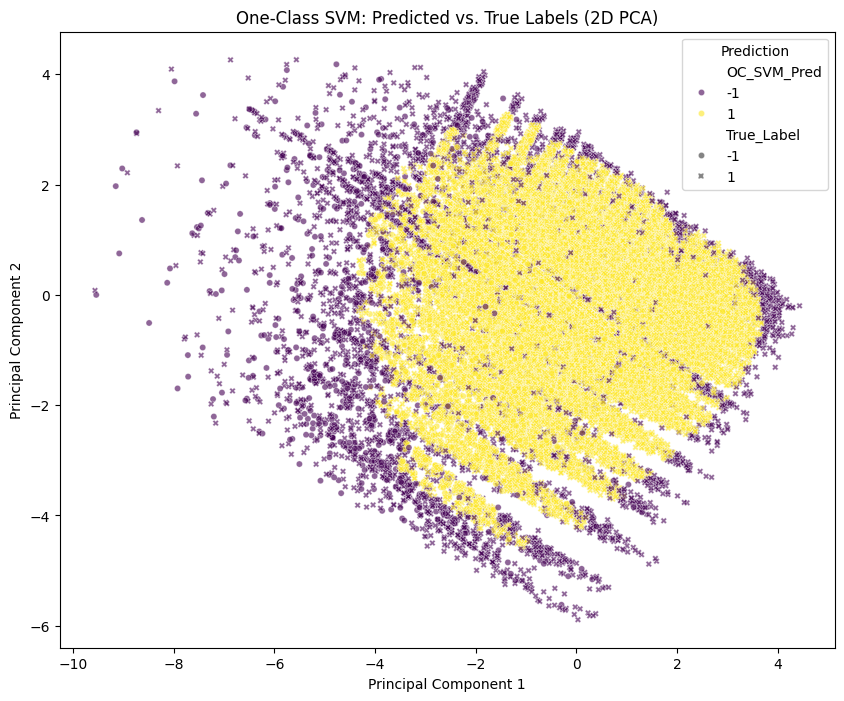


--- Visualizing Isolation Forest Predictions ---


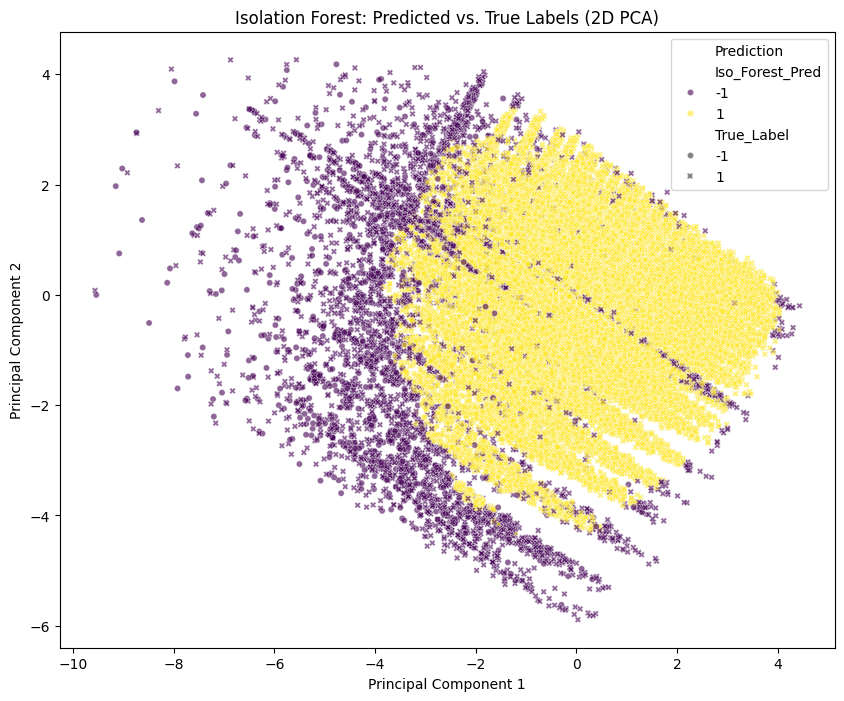

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# --- Step 1: Prepare the Data and Predictions ---
# You already have X_test, oc_svm_preds, and iso_forest_preds from the previous code block.
# Let's add the true labels for comparison.
# Remember to convert the true labels for the plot as well.
y_test_plot = y_test.apply(lambda x: -1 if x == 1 else 1)

# --- Step 2: Dimensionality Reduction using PCA ---
# We reduce the data to 2 principal components for plotting.
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Add the reduced features and predictions to a DataFrame for easy plotting
plot_data = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])
plot_data['True_Label'] = y_test_plot.values
plot_data['OC_SVM_Pred'] = oc_svm_preds
plot_data['Iso_Forest_Pred'] = iso_forest_preds

# --- Step 3: Visualize One-Class SVM Predictions ---
print("\n--- Visualizing One-Class SVM Predictions ---")
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='OC_SVM_Pred',
    style='True_Label',
    palette='viridis',
    data=plot_data,
    s=20,
    alpha=0.6
)
plt.title('One-Class SVM: Predicted vs. True Labels (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Prediction', loc='upper right')
plt.show()

# --- Step 4: Visualize Isolation Forest Predictions ---
print("\n--- Visualizing Isolation Forest Predictions ---")
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Iso_Forest_Pred',
    style='True_Label',
    palette='viridis',
    data=plot_data,
    s=20,
    alpha=0.6
)
plt.title('Isolation Forest: Predicted vs. True Labels (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Prediction', loc='upper right')
plt.show()

#

### Random chance

In [ ]:
# Random predictions: assign -1 with probability = fraud_rate
np.random.seed(42)
random_preds = np.where(np.random.rand(len(y_test_converted)) < fraud_rate, -1, 1)

print("\nRandom Chance Baseline:")
print(classification_report(y_test_converted, random_preds, digits=4))

print(confusion_matrix(y_test_converted, random_preds))



Random Chance Baseline:
              precision    recall  f1-score   support

          -1     0.0780    0.0789    0.0785      7413
           1     0.9194    0.9185    0.9190     84841

    accuracy                         0.8511     92254
   macro avg     0.4987    0.4987    0.4987     92254
weighted avg     0.8518    0.8511    0.8514     92254

[[  585  6828]
 [ 6912 77929]]


### Compare with model from literature and supervised method at the same time -> Logistic Regressor


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train/test split for supervised baseline (use y, not converted labels)
X_train_sup, X_test_sup, y_train_sup, y_test_sup = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train_sup, y_train_sup)

y_pred_sup = log_reg.predict(X_test_sup)

print("\nSupervised Baseline (Logistic Regression):")
print(classification_report(y_test_sup, y_pred_sup, digits=4))

print(confusion_matrix(y_test_sup, y_pred_sup))



Supervised Baseline (Logistic Regression):
              precision    recall  f1-score   support

           0     0.9577    0.6987    0.8080     84806
           1     0.1591    0.6489    0.2555      7448

    accuracy                         0.6947     92254
   macro avg     0.5584    0.6738    0.5317     92254
weighted avg     0.8933    0.6947    0.7634     92254

[[59253 25553]
 [ 2615  4833]]


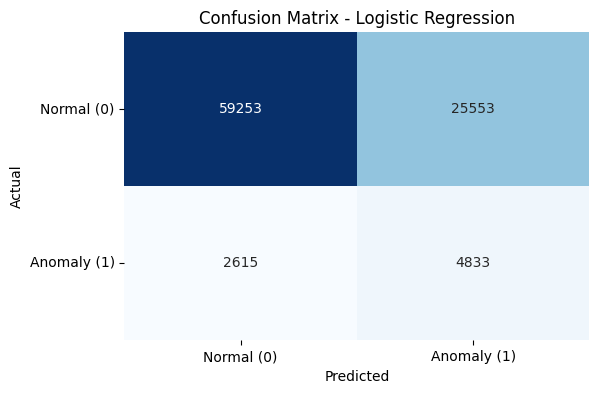

In [ ]:
# Confusion matrix for logistic regression

cm = confusion_matrix(y_test_sup, y_pred_sup)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.xticks(ticks=[0.5, 1.5], labels=['Normal (0)', 'Anomaly (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Normal (0)', 'Anomaly (1)'], rotation=0)
plt.show()

In [ ]:
df_results = pd.DataFrame()

for model, metrics in results.items():
    # Figure out which label represents fraud in this report
    if "-1" in metrics:   # unsupervised anomaly detection
        fraud_label = "-1"
    else:                 # supervised baseline (fraud is "1")
        fraud_label = "1"
    
    df_results[model] = {
        "Precision (Fraud)": metrics[fraud_label]["precision"],
        "Recall (Fraud)": metrics[fraud_label]["recall"],
        "F1 (Fraud)": metrics[fraud_label]["f1-score"]
    }

df_results = df_results.T

print("\nModel Comparison (fraud class only):")
print(df_results)


Model Comparison (fraud class only):
                     Precision (Fraud)  Recall (Fraud)  F1 (Fraud)
Random Chance                 0.078031        0.078915    0.078471
One-Class SVM                 0.138988        0.141238    0.140104
Isolation Forest              0.140877        0.142587    0.141727
Logistic Regression           0.159054        0.648899    0.255484
